# How to Develop a GAN for Generating MNIST Handwritten Digits
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/


In [1]:
# use plaidml.keras.backend
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras

Using plaidml.keras.backend backend.


In [2]:
# loading the mnist dataset
from keras.datasets.mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


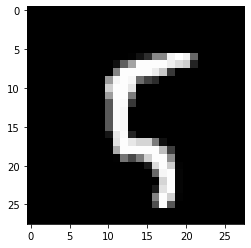

In [3]:
# plot raw pixel data
import matplotlib.pyplot as plt
i=100
plt.imshow(trainX[i], cmap='gray')

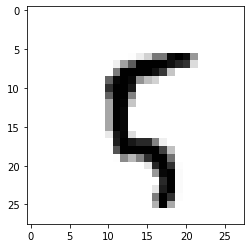

In [4]:
# plot raw pixel data
plt.imshow(trainX[i], cmap='gray_r')

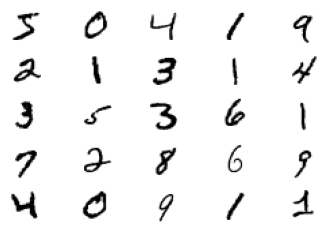

In [5]:
# example of loading the mnist dataset
from keras.datasets.mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

In [6]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

INFO:plaidml:Opening device "opencl_amd_gfx1010:xnack-.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [17]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

In [18]:
# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

In [19]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [20]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [21]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [22]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=35% fake=65%
>2 real=52% fake=77%
>3 real=47% fake=88%
>4 real=48% fake=91%
>5 real=53% fake=98%
>6 real=58% fake=100%
>7 real=59% fake=100%
>8 real=59% fake=100%
>9 real=64% fake=99%
>10 real=64% fake=100%
>11 real=73% fake=100%
>12 real=74% fake=100%
>13 real=82% fake=100%
>14 real=77% fake=100%
>15 real=80% fake=100%
>16 real=78% fake=100%
>17 real=84% fake=100%
>18 real=75% fake=100%
>19 real=80% fake=100%
>20 real=88% fake=100%
>21 real=90% fake=100%
>22 real=92% fake=100%
>23 real=91% fake=100%
>24 real=94% fake=100%
>25 real=98% fake=100%
>26 real=98% fake=100%
>27 real=97% fake=100%
>28 real=94% fake=100%
>29 real=99% fake=100%
>30 real=99% fake=100%
>31 real=99% fake=100%
>32 real=100% fake=100%
>33 real=98% fake=100%
>34 real=100% fake=100%
>35 real=100% fake=100%
>36 real=98% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=100% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fa

In [23]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 28, 28, 128)       0         
__________

INFO:plaidml:Analyzing Ops: 14 of 26 operations complete


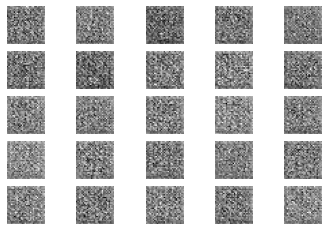

In [24]:
# example of defining and using the generator model
from numpy import zeros
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from matplotlib import pyplot

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
pyplot.show()

In [25]:
# demonstrate creating the three models in the gan
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_7 (Sequential)    (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


In [26]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [27]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

In [28]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

In [30]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load and prepare mnist training images
def load_real_samples():
	# load mnist dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(trainX, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

INFO:plaidml:Analyzing Ops: 14 of 26 operations complete
C:\Users\jiahu\miniconda3\envs\plaidml\lib\site-packages\keras\engine\training.py:489: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  warnings.warn(UserWarning(
INFO:plaidml:Analyzing Ops: 22 of 279 operations complete


>1, 1/234, d=0.688, g=0.730
>1, 2/234, d=0.680, g=0.752
>1, 3/234, d=0.676, g=0.766
>1, 4/234, d=0.667, g=0.780
>1, 5/234, d=0.664, g=0.799
>1, 6/234, d=0.658, g=0.813
>1, 7/234, d=0.653, g=0.820
>1, 8/234, d=0.649, g=0.830
>1, 9/234, d=0.651, g=0.825
>1, 10/234, d=0.647, g=0.814
>1, 11/234, d=0.657, g=0.798
>1, 12/234, d=0.658, g=0.773
>1, 13/234, d=0.665, g=0.749
>1, 14/234, d=0.668, g=0.731
>1, 15/234, d=0.672, g=0.715
>1, 16/234, d=0.669, g=0.704
>1, 17/234, d=0.662, g=0.698
>1, 18/234, d=0.663, g=0.694
>1, 19/234, d=0.656, g=0.692
>1, 20/234, d=0.650, g=0.691
>1, 21/234, d=0.644, g=0.690
>1, 22/234, d=0.639, g=0.690
>1, 23/234, d=0.629, g=0.690
>1, 24/234, d=0.624, g=0.691
>1, 25/234, d=0.616, g=0.692
>1, 26/234, d=0.605, g=0.692
>1, 27/234, d=0.601, g=0.693
>1, 28/234, d=0.590, g=0.694
>1, 29/234, d=0.585, g=0.696
>1, 30/234, d=0.572, g=0.697
>1, 31/234, d=0.561, g=0.698
>1, 32/234, d=0.555, g=0.700
>1, 33/234, d=0.541, g=0.701
>1, 34/234, d=0.531, g=0.702
>1, 35/234, d=0.516, g=

>2, 46/234, d=0.043, g=3.437
>2, 47/234, d=0.033, g=3.453
>2, 48/234, d=0.038, g=3.402
>2, 49/234, d=0.035, g=3.334
>2, 50/234, d=0.041, g=3.275
>2, 51/234, d=0.040, g=3.275
>2, 52/234, d=0.038, g=3.286
>2, 53/234, d=0.037, g=3.285
>2, 54/234, d=0.040, g=3.285
>2, 55/234, d=0.039, g=3.293
>2, 56/234, d=0.038, g=3.286
>2, 57/234, d=0.036, g=3.316
>2, 58/234, d=0.032, g=3.297
>2, 59/234, d=0.042, g=3.318
>2, 60/234, d=0.034, g=3.325
>2, 61/234, d=0.033, g=3.336
>2, 62/234, d=0.030, g=3.342
>2, 63/234, d=0.031, g=3.371
>2, 64/234, d=0.033, g=3.344
>2, 65/234, d=0.028, g=3.366
>2, 66/234, d=0.030, g=3.339
>2, 67/234, d=0.030, g=3.388
>2, 68/234, d=0.033, g=3.398
>2, 69/234, d=0.033, g=3.353
>2, 70/234, d=0.032, g=3.378
>2, 71/234, d=0.032, g=3.322
>2, 72/234, d=0.036, g=3.298
>2, 73/234, d=0.045, g=3.257
>2, 74/234, d=0.048, g=3.140
>2, 75/234, d=0.065, g=3.118
>2, 76/234, d=0.067, g=3.026
>2, 77/234, d=0.114, g=2.775
>2, 78/234, d=0.230, g=2.685
>2, 79/234, d=0.440, g=2.602
>2, 80/234, d=

>3, 92/234, d=0.616, g=0.798
>3, 93/234, d=0.617, g=0.798
>3, 94/234, d=0.606, g=0.794
>3, 95/234, d=0.651, g=0.810
>3, 96/234, d=0.641, g=0.819
>3, 97/234, d=0.623, g=0.827
>3, 98/234, d=0.648, g=0.829
>3, 99/234, d=0.671, g=0.827
>3, 100/234, d=0.680, g=0.829
>3, 101/234, d=0.688, g=0.830
>3, 102/234, d=0.687, g=0.817
>3, 103/234, d=0.676, g=0.834
>3, 104/234, d=0.709, g=0.848
>3, 105/234, d=0.694, g=0.823
>3, 106/234, d=0.723, g=0.839
>3, 107/234, d=0.712, g=0.832
>3, 108/234, d=0.727, g=0.839
>3, 109/234, d=0.720, g=0.816
>3, 110/234, d=0.750, g=0.790
>3, 111/234, d=0.755, g=0.807
>3, 112/234, d=0.750, g=0.798
>3, 113/234, d=0.773, g=0.801
>3, 114/234, d=0.756, g=0.792
>3, 115/234, d=0.773, g=0.768
>3, 116/234, d=0.766, g=0.746
>3, 117/234, d=0.756, g=0.706
>3, 118/234, d=0.773, g=0.705
>3, 119/234, d=0.784, g=0.707
>3, 120/234, d=0.791, g=0.693
>3, 121/234, d=0.802, g=0.676
>3, 122/234, d=0.817, g=0.680
>3, 123/234, d=0.812, g=0.666
>3, 124/234, d=0.820, g=0.651
>3, 125/234, d=0.8

>4, 135/234, d=0.699, g=0.710
>4, 136/234, d=0.699, g=0.700
>4, 137/234, d=0.699, g=0.708
>4, 138/234, d=0.693, g=0.701
>4, 139/234, d=0.696, g=0.705
>4, 140/234, d=0.695, g=0.716
>4, 141/234, d=0.687, g=0.721
>4, 142/234, d=0.685, g=0.700
>4, 143/234, d=0.686, g=0.703
>4, 144/234, d=0.684, g=0.704
>4, 145/234, d=0.697, g=0.717
>4, 146/234, d=0.682, g=0.697
>4, 147/234, d=0.672, g=0.706
>4, 148/234, d=0.694, g=0.716
>4, 149/234, d=0.693, g=0.713
>4, 150/234, d=0.685, g=0.703
>4, 151/234, d=0.676, g=0.699
>4, 152/234, d=0.685, g=0.707
>4, 153/234, d=0.694, g=0.720
>4, 154/234, d=0.674, g=0.713
>4, 155/234, d=0.682, g=0.712
>4, 156/234, d=0.679, g=0.739
>4, 157/234, d=0.682, g=0.728
>4, 158/234, d=0.687, g=0.709
>4, 159/234, d=0.687, g=0.726
>4, 160/234, d=0.695, g=0.738
>4, 161/234, d=0.670, g=0.720
>4, 162/234, d=0.699, g=0.725
>4, 163/234, d=0.694, g=0.725
>4, 164/234, d=0.688, g=0.727
>4, 165/234, d=0.686, g=0.743
>4, 166/234, d=0.700, g=0.719
>4, 167/234, d=0.690, g=0.720
>4, 168/23

>5, 178/234, d=0.686, g=0.716
>5, 179/234, d=0.696, g=0.714
>5, 180/234, d=0.692, g=0.706
>5, 181/234, d=0.690, g=0.715
>5, 182/234, d=0.704, g=0.704
>5, 183/234, d=0.700, g=0.714
>5, 184/234, d=0.699, g=0.704
>5, 185/234, d=0.690, g=0.713
>5, 186/234, d=0.696, g=0.700
>5, 187/234, d=0.693, g=0.703
>5, 188/234, d=0.700, g=0.698
>5, 189/234, d=0.697, g=0.700
>5, 190/234, d=0.703, g=0.692
>5, 191/234, d=0.707, g=0.689
>5, 192/234, d=0.719, g=0.698
>5, 193/234, d=0.688, g=0.685
>5, 194/234, d=0.699, g=0.684
>5, 195/234, d=0.703, g=0.677
>5, 196/234, d=0.703, g=0.680
>5, 197/234, d=0.706, g=0.688
>5, 198/234, d=0.701, g=0.681
>5, 199/234, d=0.702, g=0.683
>5, 200/234, d=0.704, g=0.691
>5, 201/234, d=0.700, g=0.693
>5, 202/234, d=0.698, g=0.683
>5, 203/234, d=0.699, g=0.673
>5, 204/234, d=0.711, g=0.696
>5, 205/234, d=0.705, g=0.694
>5, 206/234, d=0.704, g=0.689
>5, 207/234, d=0.703, g=0.700
>5, 208/234, d=0.703, g=0.695
>5, 209/234, d=0.695, g=0.700
>5, 210/234, d=0.695, g=0.677
>5, 211/23

>6, 220/234, d=0.691, g=0.719
>6, 221/234, d=0.678, g=0.729
>6, 222/234, d=0.688, g=0.730
>6, 223/234, d=0.692, g=0.732
>6, 224/234, d=0.688, g=0.724
>6, 225/234, d=0.685, g=0.731
>6, 226/234, d=0.685, g=0.727
>6, 227/234, d=0.684, g=0.735
>6, 228/234, d=0.684, g=0.732
>6, 229/234, d=0.688, g=0.731
>6, 230/234, d=0.681, g=0.732
>6, 231/234, d=0.684, g=0.710
>6, 232/234, d=0.693, g=0.716
>6, 233/234, d=0.690, g=0.719
>6, 234/234, d=0.691, g=0.713
>7, 1/234, d=0.687, g=0.716
>7, 2/234, d=0.682, g=0.709
>7, 3/234, d=0.681, g=0.715
>7, 4/234, d=0.703, g=0.716
>7, 5/234, d=0.683, g=0.717
>7, 6/234, d=0.689, g=0.720
>7, 7/234, d=0.679, g=0.710
>7, 8/234, d=0.683, g=0.720
>7, 9/234, d=0.686, g=0.716
>7, 10/234, d=0.682, g=0.722
>7, 11/234, d=0.692, g=0.726
>7, 12/234, d=0.683, g=0.724
>7, 13/234, d=0.683, g=0.726
>7, 14/234, d=0.683, g=0.716
>7, 15/234, d=0.686, g=0.708
>7, 16/234, d=0.685, g=0.719
>7, 17/234, d=0.696, g=0.710
>7, 18/234, d=0.684, g=0.714
>7, 19/234, d=0.680, g=0.703
>7, 20/2

>8, 30/234, d=0.694, g=0.689
>8, 31/234, d=0.690, g=0.688
>8, 32/234, d=0.689, g=0.682
>8, 33/234, d=0.690, g=0.682
>8, 34/234, d=0.693, g=0.685
>8, 35/234, d=0.693, g=0.681
>8, 36/234, d=0.696, g=0.683
>8, 37/234, d=0.690, g=0.688
>8, 38/234, d=0.696, g=0.699
>8, 39/234, d=0.694, g=0.695
>8, 40/234, d=0.697, g=0.713
>8, 41/234, d=0.688, g=0.715
>8, 42/234, d=0.690, g=0.711
>8, 43/234, d=0.695, g=0.727
>8, 44/234, d=0.687, g=0.721
>8, 45/234, d=0.698, g=0.707
>8, 46/234, d=0.692, g=0.714
>8, 47/234, d=0.679, g=0.704
>8, 48/234, d=0.697, g=0.700
>8, 49/234, d=0.689, g=0.691
>8, 50/234, d=0.692, g=0.675
>8, 51/234, d=0.681, g=0.683
>8, 52/234, d=0.686, g=0.671
>8, 53/234, d=0.686, g=0.689
>8, 54/234, d=0.688, g=0.704
>8, 55/234, d=0.690, g=0.723
>8, 56/234, d=0.688, g=0.725
>8, 57/234, d=0.688, g=0.734
>8, 58/234, d=0.683, g=0.736
>8, 59/234, d=0.690, g=0.741
>8, 60/234, d=0.694, g=0.733
>8, 61/234, d=0.693, g=0.717
>8, 62/234, d=0.680, g=0.693
>8, 63/234, d=0.685, g=0.692
>8, 64/234, d=

>9, 74/234, d=0.662, g=0.706
>9, 75/234, d=0.667, g=0.694
>9, 76/234, d=0.660, g=0.685
>9, 77/234, d=0.666, g=0.680
>9, 78/234, d=0.673, g=0.677
>9, 79/234, d=0.676, g=0.681
>9, 80/234, d=0.679, g=0.702
>9, 81/234, d=0.675, g=0.728
>9, 82/234, d=0.677, g=0.753
>9, 83/234, d=0.676, g=0.790
>9, 84/234, d=0.680, g=0.805
>9, 85/234, d=0.679, g=0.800
>9, 86/234, d=0.687, g=0.778
>9, 87/234, d=0.693, g=0.748
>9, 88/234, d=0.694, g=0.717
>9, 89/234, d=0.695, g=0.698
>9, 90/234, d=0.686, g=0.671
>9, 91/234, d=0.685, g=0.654
>9, 92/234, d=0.688, g=0.637
>9, 93/234, d=0.688, g=0.625
>9, 94/234, d=0.687, g=0.624
>9, 95/234, d=0.693, g=0.616
>9, 96/234, d=0.701, g=0.632
>9, 97/234, d=0.697, g=0.655
>9, 98/234, d=0.700, g=0.695
>9, 99/234, d=0.705, g=0.737
>9, 100/234, d=0.695, g=0.760
>9, 101/234, d=0.690, g=0.777
>9, 102/234, d=0.697, g=0.784
>9, 103/234, d=0.688, g=0.772
>9, 104/234, d=0.698, g=0.750
>9, 105/234, d=0.696, g=0.729
>9, 106/234, d=0.694, g=0.709
>9, 107/234, d=0.690, g=0.693
>9, 10

>10, 113/234, d=0.692, g=0.714
>10, 114/234, d=0.681, g=0.725
>10, 115/234, d=0.689, g=0.726
>10, 116/234, d=0.697, g=0.718
>10, 117/234, d=0.696, g=0.717
>10, 118/234, d=0.696, g=0.709
>10, 119/234, d=0.693, g=0.720
>10, 120/234, d=0.687, g=0.708
>10, 121/234, d=0.699, g=0.705
>10, 122/234, d=0.701, g=0.710
>10, 123/234, d=0.700, g=0.703
>10, 124/234, d=0.692, g=0.707
>10, 125/234, d=0.695, g=0.711
>10, 126/234, d=0.701, g=0.699
>10, 127/234, d=0.691, g=0.698
>10, 128/234, d=0.703, g=0.698
>10, 129/234, d=0.703, g=0.713
>10, 130/234, d=0.698, g=0.706
>10, 131/234, d=0.696, g=0.704
>10, 132/234, d=0.690, g=0.717
>10, 133/234, d=0.688, g=0.712
>10, 134/234, d=0.690, g=0.720
>10, 135/234, d=0.697, g=0.713
>10, 136/234, d=0.692, g=0.709
>10, 137/234, d=0.692, g=0.714
>10, 138/234, d=0.679, g=0.719
>10, 139/234, d=0.687, g=0.739
>10, 140/234, d=0.682, g=0.738
>10, 141/234, d=0.674, g=0.734
>10, 142/234, d=0.671, g=0.727
>10, 143/234, d=0.680, g=0.715
>10, 144/234, d=0.682, g=0.718
>10, 145

INFO:plaidml:Analyzing Ops: 9 of 26 operations complete


>Accuracy real: 64%, fake: 71%
>11, 1/234, d=0.671, g=0.725
>11, 2/234, d=0.684, g=0.714
>11, 3/234, d=0.686, g=0.702
>11, 4/234, d=0.684, g=0.705
>11, 5/234, d=0.688, g=0.713
>11, 6/234, d=0.680, g=0.701
>11, 7/234, d=0.690, g=0.697
>11, 8/234, d=0.684, g=0.699
>11, 9/234, d=0.691, g=0.694
>11, 10/234, d=0.687, g=0.695
>11, 11/234, d=0.686, g=0.696
>11, 12/234, d=0.694, g=0.704
>11, 13/234, d=0.693, g=0.713
>11, 14/234, d=0.696, g=0.709
>11, 15/234, d=0.694, g=0.710
>11, 16/234, d=0.691, g=0.714
>11, 17/234, d=0.694, g=0.717
>11, 18/234, d=0.694, g=0.712
>11, 19/234, d=0.695, g=0.701
>11, 20/234, d=0.696, g=0.695
>11, 21/234, d=0.683, g=0.683
>11, 22/234, d=0.698, g=0.691
>11, 23/234, d=0.691, g=0.704
>11, 24/234, d=0.686, g=0.710
>11, 25/234, d=0.685, g=0.710
>11, 26/234, d=0.688, g=0.715
>11, 27/234, d=0.690, g=0.701
>11, 28/234, d=0.687, g=0.695
>11, 29/234, d=0.683, g=0.682
>11, 30/234, d=0.691, g=0.678
>11, 31/234, d=0.697, g=0.682
>11, 32/234, d=0.681, g=0.673
>11, 33/234, d=0.6

>12, 37/234, d=0.683, g=0.684
>12, 38/234, d=0.678, g=0.670
>12, 39/234, d=0.688, g=0.664
>12, 40/234, d=0.678, g=0.657
>12, 41/234, d=0.679, g=0.665
>12, 42/234, d=0.689, g=0.685
>12, 43/234, d=0.689, g=0.706
>12, 44/234, d=0.684, g=0.717
>12, 45/234, d=0.680, g=0.742
>12, 46/234, d=0.678, g=0.743
>12, 47/234, d=0.687, g=0.748
>12, 48/234, d=0.681, g=0.737
>12, 49/234, d=0.676, g=0.724
>12, 50/234, d=0.677, g=0.715
>12, 51/234, d=0.681, g=0.706
>12, 52/234, d=0.677, g=0.704
>12, 53/234, d=0.684, g=0.703
>12, 54/234, d=0.678, g=0.720
>12, 55/234, d=0.683, g=0.718
>12, 56/234, d=0.672, g=0.720
>12, 57/234, d=0.675, g=0.727
>12, 58/234, d=0.668, g=0.717
>12, 59/234, d=0.671, g=0.719
>12, 60/234, d=0.682, g=0.717
>12, 61/234, d=0.677, g=0.709
>12, 62/234, d=0.673, g=0.732
>12, 63/234, d=0.681, g=0.726
>12, 64/234, d=0.672, g=0.754
>12, 65/234, d=0.679, g=0.757
>12, 66/234, d=0.680, g=0.743
>12, 67/234, d=0.684, g=0.717
>12, 68/234, d=0.684, g=0.705
>12, 69/234, d=0.682, g=0.693
>12, 70/23

>13, 72/234, d=0.687, g=0.726
>13, 73/234, d=0.692, g=0.699
>13, 74/234, d=0.688, g=0.697
>13, 75/234, d=0.689, g=0.696
>13, 76/234, d=0.682, g=0.701
>13, 77/234, d=0.696, g=0.712
>13, 78/234, d=0.688, g=0.727
>13, 79/234, d=0.695, g=0.705
>13, 80/234, d=0.698, g=0.711
>13, 81/234, d=0.693, g=0.726
>13, 82/234, d=0.693, g=0.714
>13, 83/234, d=0.700, g=0.712
>13, 84/234, d=0.689, g=0.701
>13, 85/234, d=0.688, g=0.702
>13, 86/234, d=0.684, g=0.702
>13, 87/234, d=0.676, g=0.708
>13, 88/234, d=0.680, g=0.715
>13, 89/234, d=0.673, g=0.704
>13, 90/234, d=0.677, g=0.725
>13, 91/234, d=0.676, g=0.740
>13, 92/234, d=0.672, g=0.751
>13, 93/234, d=0.677, g=0.737
>13, 94/234, d=0.689, g=0.720
>13, 95/234, d=0.672, g=0.719
>13, 96/234, d=0.673, g=0.713
>13, 97/234, d=0.674, g=0.702
>13, 98/234, d=0.682, g=0.713
>13, 99/234, d=0.677, g=0.719
>13, 100/234, d=0.680, g=0.717
>13, 101/234, d=0.691, g=0.712
>13, 102/234, d=0.689, g=0.717
>13, 103/234, d=0.680, g=0.716
>13, 104/234, d=0.698, g=0.709
>13, 

>14, 107/234, d=0.674, g=0.724
>14, 108/234, d=0.683, g=0.720
>14, 109/234, d=0.688, g=0.708
>14, 110/234, d=0.687, g=0.701
>14, 111/234, d=0.692, g=0.699
>14, 112/234, d=0.681, g=0.688
>14, 113/234, d=0.680, g=0.687
>14, 114/234, d=0.689, g=0.698
>14, 115/234, d=0.680, g=0.702
>14, 116/234, d=0.685, g=0.712
>14, 117/234, d=0.685, g=0.713
>14, 118/234, d=0.692, g=0.706
>14, 119/234, d=0.687, g=0.699
>14, 120/234, d=0.693, g=0.692
>14, 121/234, d=0.686, g=0.710
>14, 122/234, d=0.684, g=0.715
>14, 123/234, d=0.692, g=0.730
>14, 124/234, d=0.683, g=0.739
>14, 125/234, d=0.689, g=0.721
>14, 126/234, d=0.683, g=0.696
>14, 127/234, d=0.695, g=0.685
>14, 128/234, d=0.677, g=0.682
>14, 129/234, d=0.688, g=0.689
>14, 130/234, d=0.681, g=0.701
>14, 131/234, d=0.679, g=0.724
>14, 132/234, d=0.678, g=0.732
>14, 133/234, d=0.690, g=0.721
>14, 134/234, d=0.680, g=0.719
>14, 135/234, d=0.678, g=0.713
>14, 136/234, d=0.685, g=0.716
>14, 137/234, d=0.679, g=0.706
>14, 138/234, d=0.683, g=0.703
>14, 139

>15, 141/234, d=0.684, g=0.711
>15, 142/234, d=0.687, g=0.724
>15, 143/234, d=0.687, g=0.723
>15, 144/234, d=0.675, g=0.713
>15, 145/234, d=0.671, g=0.725
>15, 146/234, d=0.683, g=0.709
>15, 147/234, d=0.679, g=0.734
>15, 148/234, d=0.671, g=0.740
>15, 149/234, d=0.681, g=0.731
>15, 150/234, d=0.688, g=0.722
>15, 151/234, d=0.688, g=0.710
>15, 152/234, d=0.686, g=0.700
>15, 153/234, d=0.675, g=0.686
>15, 154/234, d=0.692, g=0.692
>15, 155/234, d=0.683, g=0.716
>15, 156/234, d=0.685, g=0.723
>15, 157/234, d=0.691, g=0.721
>15, 158/234, d=0.676, g=0.700
>15, 159/234, d=0.684, g=0.683
>15, 160/234, d=0.694, g=0.684
>15, 161/234, d=0.690, g=0.677
>15, 162/234, d=0.697, g=0.710
>15, 163/234, d=0.691, g=0.753
>15, 164/234, d=0.697, g=0.725
>15, 165/234, d=0.695, g=0.715
>15, 166/234, d=0.686, g=0.691
>15, 167/234, d=0.692, g=0.673
>15, 168/234, d=0.684, g=0.650
>15, 169/234, d=0.702, g=0.675
>15, 170/234, d=0.684, g=0.716
>15, 171/234, d=0.688, g=0.741
>15, 172/234, d=0.690, g=0.762
>15, 173

>16, 174/234, d=0.692, g=0.730
>16, 175/234, d=0.688, g=0.709
>16, 176/234, d=0.683, g=0.706
>16, 177/234, d=0.681, g=0.705
>16, 178/234, d=0.681, g=0.708
>16, 179/234, d=0.691, g=0.709
>16, 180/234, d=0.684, g=0.713
>16, 181/234, d=0.686, g=0.720
>16, 182/234, d=0.684, g=0.720
>16, 183/234, d=0.687, g=0.710
>16, 184/234, d=0.684, g=0.712
>16, 185/234, d=0.685, g=0.712
>16, 186/234, d=0.684, g=0.716
>16, 187/234, d=0.682, g=0.705
>16, 188/234, d=0.683, g=0.709
>16, 189/234, d=0.679, g=0.731
>16, 190/234, d=0.678, g=0.734
>16, 191/234, d=0.680, g=0.723
>16, 192/234, d=0.684, g=0.706
>16, 193/234, d=0.683, g=0.677
>16, 194/234, d=0.687, g=0.694
>16, 195/234, d=0.680, g=0.713
>16, 196/234, d=0.685, g=0.730
>16, 197/234, d=0.692, g=0.713
>16, 198/234, d=0.693, g=0.708
>16, 199/234, d=0.684, g=0.697
>16, 200/234, d=0.676, g=0.696
>16, 201/234, d=0.696, g=0.698
>16, 202/234, d=0.688, g=0.702
>16, 203/234, d=0.690, g=0.716
>16, 204/234, d=0.687, g=0.710
>16, 205/234, d=0.687, g=0.708
>16, 206

>17, 209/234, d=0.695, g=0.740
>17, 210/234, d=0.687, g=0.732
>17, 211/234, d=0.676, g=0.704
>17, 212/234, d=0.678, g=0.684
>17, 213/234, d=0.688, g=0.671
>17, 214/234, d=0.687, g=0.699
>17, 215/234, d=0.689, g=0.750
>17, 216/234, d=0.685, g=0.766
>17, 217/234, d=0.693, g=0.734
>17, 218/234, d=0.692, g=0.693
>17, 219/234, d=0.695, g=0.670
>17, 220/234, d=0.686, g=0.661
>17, 221/234, d=0.699, g=0.690
>17, 222/234, d=0.688, g=0.744
>17, 223/234, d=0.680, g=0.756
>17, 224/234, d=0.694, g=0.722
>17, 225/234, d=0.683, g=0.688
>17, 226/234, d=0.683, g=0.676
>17, 227/234, d=0.689, g=0.696
>17, 228/234, d=0.699, g=0.730
>17, 229/234, d=0.677, g=0.756
>17, 230/234, d=0.688, g=0.744
>17, 231/234, d=0.682, g=0.711
>17, 232/234, d=0.682, g=0.673
>17, 233/234, d=0.689, g=0.658
>17, 234/234, d=0.688, g=0.675
>18, 1/234, d=0.694, g=0.720
>18, 2/234, d=0.682, g=0.765
>18, 3/234, d=0.681, g=0.777
>18, 4/234, d=0.675, g=0.759
>18, 5/234, d=0.687, g=0.700
>18, 6/234, d=0.689, g=0.670
>18, 7/234, d=0.692,

>19, 11/234, d=0.681, g=0.715
>19, 12/234, d=0.697, g=0.680
>19, 13/234, d=0.690, g=0.655
>19, 14/234, d=0.673, g=0.670
>19, 15/234, d=0.695, g=0.708
>19, 16/234, d=0.693, g=0.770
>19, 17/234, d=0.688, g=0.780
>19, 18/234, d=0.686, g=0.744
>19, 19/234, d=0.694, g=0.699
>19, 20/234, d=0.691, g=0.650
>19, 21/234, d=0.686, g=0.634
>19, 22/234, d=0.687, g=0.659
>19, 23/234, d=0.687, g=0.753
>19, 24/234, d=0.681, g=0.823
>19, 25/234, d=0.687, g=0.819
>19, 26/234, d=0.691, g=0.730
>19, 27/234, d=0.686, g=0.660
>19, 28/234, d=0.680, g=0.630
>19, 29/234, d=0.684, g=0.645
>19, 30/234, d=0.691, g=0.718
>19, 31/234, d=0.692, g=0.808
>19, 32/234, d=0.685, g=0.817
>19, 33/234, d=0.695, g=0.738
>19, 34/234, d=0.691, g=0.676
>19, 35/234, d=0.688, g=0.630
>19, 36/234, d=0.692, g=0.635
>19, 37/234, d=0.684, g=0.688
>19, 38/234, d=0.687, g=0.756
>19, 39/234, d=0.680, g=0.800
>19, 40/234, d=0.688, g=0.758
>19, 41/234, d=0.685, g=0.703
>19, 42/234, d=0.691, g=0.670
>19, 43/234, d=0.690, g=0.647
>19, 44/23

>20, 46/234, d=0.682, g=0.693
>20, 47/234, d=0.683, g=0.716
>20, 48/234, d=0.688, g=0.725
>20, 49/234, d=0.685, g=0.731
>20, 50/234, d=0.682, g=0.706
>20, 51/234, d=0.689, g=0.694
>20, 52/234, d=0.684, g=0.690
>20, 53/234, d=0.685, g=0.686
>20, 54/234, d=0.688, g=0.684
>20, 55/234, d=0.687, g=0.695
>20, 56/234, d=0.683, g=0.717
>20, 57/234, d=0.682, g=0.748
>20, 58/234, d=0.687, g=0.749
>20, 59/234, d=0.679, g=0.736
>20, 60/234, d=0.688, g=0.701
>20, 61/234, d=0.692, g=0.656
>20, 62/234, d=0.675, g=0.654
>20, 63/234, d=0.686, g=0.667
>20, 64/234, d=0.690, g=0.718
>20, 65/234, d=0.685, g=0.777
>20, 66/234, d=0.690, g=0.793
>20, 67/234, d=0.687, g=0.771
>20, 68/234, d=0.687, g=0.702
>20, 69/234, d=0.687, g=0.653
>20, 70/234, d=0.690, g=0.645
>20, 71/234, d=0.697, g=0.661
>20, 72/234, d=0.684, g=0.704
>20, 73/234, d=0.683, g=0.762
>20, 74/234, d=0.693, g=0.777
>20, 75/234, d=0.683, g=0.767
>20, 76/234, d=0.681, g=0.704
>20, 77/234, d=0.682, g=0.666
>20, 78/234, d=0.680, g=0.655
>20, 79/23

>21, 79/234, d=0.695, g=0.657
>21, 80/234, d=0.692, g=0.673
>21, 81/234, d=0.680, g=0.712
>21, 82/234, d=0.680, g=0.736
>21, 83/234, d=0.690, g=0.734
>21, 84/234, d=0.684, g=0.706
>21, 85/234, d=0.685, g=0.677
>21, 86/234, d=0.686, g=0.681
>21, 87/234, d=0.697, g=0.692
>21, 88/234, d=0.693, g=0.720
>21, 89/234, d=0.694, g=0.717
>21, 90/234, d=0.675, g=0.721
>21, 91/234, d=0.679, g=0.718
>21, 92/234, d=0.683, g=0.705
>21, 93/234, d=0.687, g=0.683
>21, 94/234, d=0.693, g=0.680
>21, 95/234, d=0.683, g=0.697
>21, 96/234, d=0.685, g=0.729
>21, 97/234, d=0.682, g=0.748
>21, 98/234, d=0.692, g=0.724
>21, 99/234, d=0.684, g=0.686
>21, 100/234, d=0.685, g=0.674
>21, 101/234, d=0.687, g=0.702
>21, 102/234, d=0.687, g=0.715
>21, 103/234, d=0.684, g=0.745
>21, 104/234, d=0.681, g=0.760
>21, 105/234, d=0.684, g=0.711
>21, 106/234, d=0.688, g=0.684
>21, 107/234, d=0.685, g=0.666
>21, 108/234, d=0.685, g=0.676
>21, 109/234, d=0.689, g=0.713
>21, 110/234, d=0.696, g=0.727
>21, 111/234, d=0.687, g=0.72

>22, 115/234, d=0.685, g=0.769
>22, 116/234, d=0.691, g=0.758
>22, 117/234, d=0.690, g=0.713
>22, 118/234, d=0.685, g=0.685
>22, 119/234, d=0.677, g=0.670
>22, 120/234, d=0.689, g=0.668
>22, 121/234, d=0.689, g=0.688
>22, 122/234, d=0.688, g=0.715
>22, 123/234, d=0.676, g=0.744
>22, 124/234, d=0.689, g=0.736
>22, 125/234, d=0.679, g=0.750
>22, 126/234, d=0.685, g=0.727
>22, 127/234, d=0.684, g=0.675
>22, 128/234, d=0.686, g=0.662
>22, 129/234, d=0.681, g=0.687
>22, 130/234, d=0.700, g=0.744
>22, 131/234, d=0.690, g=0.769
>22, 132/234, d=0.687, g=0.767
>22, 133/234, d=0.686, g=0.719
>22, 134/234, d=0.687, g=0.678
>22, 135/234, d=0.675, g=0.667
>22, 136/234, d=0.682, g=0.684
>22, 137/234, d=0.686, g=0.705
>22, 138/234, d=0.691, g=0.746
>22, 139/234, d=0.691, g=0.738
>22, 140/234, d=0.688, g=0.729
>22, 141/234, d=0.688, g=0.680
>22, 142/234, d=0.694, g=0.656
>22, 143/234, d=0.680, g=0.658
>22, 144/234, d=0.689, g=0.686
>22, 145/234, d=0.680, g=0.747
>22, 146/234, d=0.686, g=0.809
>22, 147

>23, 148/234, d=0.697, g=0.741
>23, 149/234, d=0.687, g=0.748
>23, 150/234, d=0.680, g=0.709
>23, 151/234, d=0.694, g=0.698
>23, 152/234, d=0.687, g=0.676
>23, 153/234, d=0.687, g=0.677
>23, 154/234, d=0.684, g=0.686
>23, 155/234, d=0.691, g=0.720
>23, 156/234, d=0.683, g=0.740
>23, 157/234, d=0.683, g=0.741
>23, 158/234, d=0.676, g=0.703
>23, 159/234, d=0.690, g=0.695
>23, 160/234, d=0.682, g=0.698
>23, 161/234, d=0.686, g=0.703
>23, 162/234, d=0.685, g=0.699
>23, 163/234, d=0.690, g=0.697
>23, 164/234, d=0.683, g=0.705
>23, 165/234, d=0.694, g=0.735
>23, 166/234, d=0.680, g=0.721
>23, 167/234, d=0.689, g=0.707
>23, 168/234, d=0.684, g=0.698
>23, 169/234, d=0.682, g=0.694
>23, 170/234, d=0.684, g=0.701
>23, 171/234, d=0.683, g=0.718
>23, 172/234, d=0.684, g=0.734
>23, 173/234, d=0.692, g=0.708
>23, 174/234, d=0.690, g=0.690
>23, 175/234, d=0.685, g=0.698
>23, 176/234, d=0.685, g=0.712
>23, 177/234, d=0.687, g=0.712
>23, 178/234, d=0.690, g=0.732
>23, 179/234, d=0.686, g=0.726
>23, 180

>24, 182/234, d=0.678, g=0.682
>24, 183/234, d=0.686, g=0.702
>24, 184/234, d=0.679, g=0.703
>24, 185/234, d=0.688, g=0.711
>24, 186/234, d=0.688, g=0.690
>24, 187/234, d=0.684, g=0.688
>24, 188/234, d=0.688, g=0.720
>24, 189/234, d=0.677, g=0.761
>24, 190/234, d=0.684, g=0.746
>24, 191/234, d=0.680, g=0.707
>24, 192/234, d=0.692, g=0.684
>24, 193/234, d=0.693, g=0.667
>24, 194/234, d=0.690, g=0.682
>24, 195/234, d=0.687, g=0.736
>24, 196/234, d=0.685, g=0.745
>24, 197/234, d=0.681, g=0.724
>24, 198/234, d=0.686, g=0.697
>24, 199/234, d=0.671, g=0.698
>24, 200/234, d=0.682, g=0.701
>24, 201/234, d=0.690, g=0.738
>24, 202/234, d=0.680, g=0.748
>24, 203/234, d=0.686, g=0.722
>24, 204/234, d=0.681, g=0.715
>24, 205/234, d=0.686, g=0.691
>24, 206/234, d=0.682, g=0.667
>24, 207/234, d=0.681, g=0.684
>24, 208/234, d=0.681, g=0.739
>24, 209/234, d=0.687, g=0.768
>24, 210/234, d=0.682, g=0.743
>24, 211/234, d=0.691, g=0.691
>24, 212/234, d=0.681, g=0.657
>24, 213/234, d=0.694, g=0.708
>24, 214

>25, 215/234, d=0.687, g=0.691
>25, 216/234, d=0.684, g=0.688
>25, 217/234, d=0.685, g=0.694
>25, 218/234, d=0.686, g=0.713
>25, 219/234, d=0.692, g=0.722
>25, 220/234, d=0.690, g=0.735
>25, 221/234, d=0.674, g=0.705
>25, 222/234, d=0.691, g=0.683
>25, 223/234, d=0.681, g=0.673
>25, 224/234, d=0.698, g=0.704
>25, 225/234, d=0.692, g=0.724
>25, 226/234, d=0.685, g=0.746
>25, 227/234, d=0.680, g=0.721
>25, 228/234, d=0.690, g=0.678
>25, 229/234, d=0.690, g=0.686
>25, 230/234, d=0.687, g=0.736
>25, 231/234, d=0.688, g=0.768
>25, 232/234, d=0.689, g=0.725
>25, 233/234, d=0.681, g=0.680
>25, 234/234, d=0.689, g=0.652
>26, 1/234, d=0.684, g=0.683
>26, 2/234, d=0.688, g=0.726
>26, 3/234, d=0.688, g=0.719
>26, 4/234, d=0.692, g=0.709
>26, 5/234, d=0.690, g=0.720
>26, 6/234, d=0.687, g=0.717
>26, 7/234, d=0.677, g=0.730
>26, 8/234, d=0.685, g=0.741
>26, 9/234, d=0.686, g=0.709
>26, 10/234, d=0.681, g=0.673
>26, 11/234, d=0.681, g=0.667
>26, 12/234, d=0.680, g=0.680
>26, 13/234, d=0.684, g=0.712

>27, 16/234, d=0.686, g=0.697
>27, 17/234, d=0.693, g=0.671
>27, 18/234, d=0.692, g=0.656
>27, 19/234, d=0.689, g=0.680
>27, 20/234, d=0.686, g=0.718
>27, 21/234, d=0.681, g=0.781
>27, 22/234, d=0.680, g=0.774
>27, 23/234, d=0.688, g=0.731
>27, 24/234, d=0.691, g=0.666
>27, 25/234, d=0.687, g=0.654
>27, 26/234, d=0.687, g=0.664
>27, 27/234, d=0.690, g=0.727
>27, 28/234, d=0.698, g=0.778
>27, 29/234, d=0.678, g=0.768
>27, 30/234, d=0.682, g=0.695
>27, 31/234, d=0.696, g=0.667
>27, 32/234, d=0.685, g=0.671
>27, 33/234, d=0.692, g=0.714
>27, 34/234, d=0.684, g=0.732
>27, 35/234, d=0.689, g=0.745
>27, 36/234, d=0.681, g=0.688
>27, 37/234, d=0.680, g=0.679
>27, 38/234, d=0.684, g=0.711
>27, 39/234, d=0.685, g=0.722
>27, 40/234, d=0.682, g=0.715
>27, 41/234, d=0.672, g=0.733
>27, 42/234, d=0.680, g=0.718
>27, 43/234, d=0.677, g=0.708
>27, 44/234, d=0.686, g=0.674
>27, 45/234, d=0.682, g=0.672
>27, 46/234, d=0.690, g=0.696
>27, 47/234, d=0.696, g=0.731
>27, 48/234, d=0.692, g=0.728
>27, 49/23

>28, 51/234, d=0.681, g=0.689
>28, 52/234, d=0.682, g=0.699
>28, 53/234, d=0.682, g=0.719
>28, 54/234, d=0.688, g=0.702
>28, 55/234, d=0.690, g=0.705
>28, 56/234, d=0.691, g=0.702
>28, 57/234, d=0.687, g=0.709
>28, 58/234, d=0.684, g=0.722
>28, 59/234, d=0.683, g=0.711
>28, 60/234, d=0.689, g=0.684
>28, 61/234, d=0.685, g=0.707
>28, 62/234, d=0.671, g=0.737
>28, 63/234, d=0.681, g=0.726
>28, 64/234, d=0.684, g=0.691
>28, 65/234, d=0.690, g=0.689
>28, 66/234, d=0.677, g=0.704
>28, 67/234, d=0.689, g=0.724
>28, 68/234, d=0.692, g=0.727
>28, 69/234, d=0.680, g=0.715
>28, 70/234, d=0.682, g=0.718
>28, 71/234, d=0.686, g=0.694
>28, 72/234, d=0.691, g=0.664
>28, 73/234, d=0.688, g=0.673
>28, 74/234, d=0.696, g=0.735
>28, 75/234, d=0.684, g=0.732
>28, 76/234, d=0.685, g=0.715
>28, 77/234, d=0.690, g=0.688
>28, 78/234, d=0.684, g=0.695
>28, 79/234, d=0.688, g=0.718
>28, 80/234, d=0.683, g=0.703
>28, 81/234, d=0.681, g=0.699
>28, 82/234, d=0.689, g=0.700
>28, 83/234, d=0.685, g=0.706
>28, 84/23

>29, 85/234, d=0.685, g=0.720
>29, 86/234, d=0.681, g=0.690
>29, 87/234, d=0.682, g=0.663
>29, 88/234, d=0.683, g=0.701
>29, 89/234, d=0.689, g=0.725
>29, 90/234, d=0.693, g=0.723
>29, 91/234, d=0.686, g=0.723
>29, 92/234, d=0.686, g=0.717
>29, 93/234, d=0.686, g=0.717
>29, 94/234, d=0.680, g=0.723
>29, 95/234, d=0.681, g=0.717
>29, 96/234, d=0.694, g=0.699
>29, 97/234, d=0.693, g=0.703
>29, 98/234, d=0.686, g=0.685
>29, 99/234, d=0.684, g=0.704
>29, 100/234, d=0.688, g=0.699
>29, 101/234, d=0.692, g=0.717
>29, 102/234, d=0.685, g=0.693
>29, 103/234, d=0.687, g=0.685
>29, 104/234, d=0.695, g=0.699
>29, 105/234, d=0.688, g=0.734
>29, 106/234, d=0.684, g=0.757
>29, 107/234, d=0.689, g=0.732
>29, 108/234, d=0.682, g=0.674
>29, 109/234, d=0.681, g=0.673
>29, 110/234, d=0.680, g=0.705
>29, 111/234, d=0.680, g=0.712
>29, 112/234, d=0.685, g=0.717
>29, 113/234, d=0.687, g=0.724
>29, 114/234, d=0.681, g=0.752
>29, 115/234, d=0.686, g=0.724
>29, 116/234, d=0.687, g=0.671
>29, 117/234, d=0.689, 

>30, 120/234, d=0.702, g=0.720
>30, 121/234, d=0.682, g=0.682
>30, 122/234, d=0.684, g=0.690
>30, 123/234, d=0.689, g=0.705
>30, 124/234, d=0.684, g=0.747
>30, 125/234, d=0.687, g=0.732
>30, 126/234, d=0.688, g=0.695
>30, 127/234, d=0.693, g=0.665
>30, 128/234, d=0.681, g=0.682
>30, 129/234, d=0.691, g=0.702
>30, 130/234, d=0.690, g=0.734
>30, 131/234, d=0.676, g=0.735
>30, 132/234, d=0.685, g=0.736
>30, 133/234, d=0.687, g=0.702
>30, 134/234, d=0.689, g=0.712
>30, 135/234, d=0.690, g=0.724
>30, 136/234, d=0.687, g=0.688
>30, 137/234, d=0.689, g=0.695
>30, 138/234, d=0.683, g=0.710
>30, 139/234, d=0.687, g=0.698
>30, 140/234, d=0.684, g=0.713
>30, 141/234, d=0.685, g=0.711
>30, 142/234, d=0.689, g=0.710
>30, 143/234, d=0.681, g=0.696
>30, 144/234, d=0.686, g=0.668
>30, 145/234, d=0.687, g=0.698
>30, 146/234, d=0.693, g=0.731
>30, 147/234, d=0.688, g=0.715
>30, 148/234, d=0.687, g=0.725
>30, 149/234, d=0.688, g=0.724
>30, 150/234, d=0.683, g=0.708
>30, 151/234, d=0.680, g=0.694
>30, 152

>31, 153/234, d=0.691, g=0.706
>31, 154/234, d=0.691, g=0.676
>31, 155/234, d=0.692, g=0.684
>31, 156/234, d=0.683, g=0.703
>31, 157/234, d=0.684, g=0.729
>31, 158/234, d=0.690, g=0.726
>31, 159/234, d=0.688, g=0.706
>31, 160/234, d=0.698, g=0.709
>31, 161/234, d=0.683, g=0.682
>31, 162/234, d=0.686, g=0.718
>31, 163/234, d=0.689, g=0.728
>31, 164/234, d=0.684, g=0.709
>31, 165/234, d=0.677, g=0.694
>31, 166/234, d=0.683, g=0.689
>31, 167/234, d=0.688, g=0.709
>31, 168/234, d=0.689, g=0.742
>31, 169/234, d=0.683, g=0.737
>31, 170/234, d=0.678, g=0.705
>31, 171/234, d=0.684, g=0.668
>31, 172/234, d=0.681, g=0.665
>31, 173/234, d=0.693, g=0.680
>31, 174/234, d=0.701, g=0.730
>31, 175/234, d=0.678, g=0.790
>31, 176/234, d=0.694, g=0.758
>31, 177/234, d=0.683, g=0.706
>31, 178/234, d=0.688, g=0.658
>31, 179/234, d=0.688, g=0.647
>31, 180/234, d=0.690, g=0.688
>31, 181/234, d=0.685, g=0.749
>31, 182/234, d=0.685, g=0.803
>31, 183/234, d=0.683, g=0.777
>31, 184/234, d=0.685, g=0.700
>31, 185

>32, 187/234, d=0.686, g=0.715
>32, 188/234, d=0.682, g=0.732
>32, 189/234, d=0.689, g=0.740
>32, 190/234, d=0.697, g=0.707
>32, 191/234, d=0.686, g=0.677
>32, 192/234, d=0.683, g=0.682
>32, 193/234, d=0.693, g=0.739
>32, 194/234, d=0.680, g=0.745
>32, 195/234, d=0.683, g=0.728
>32, 196/234, d=0.673, g=0.694
>32, 197/234, d=0.682, g=0.679
>32, 198/234, d=0.686, g=0.698
>32, 199/234, d=0.691, g=0.705
>32, 200/234, d=0.686, g=0.713
>32, 201/234, d=0.684, g=0.691
>32, 202/234, d=0.690, g=0.711
>32, 203/234, d=0.693, g=0.761
>32, 204/234, d=0.684, g=0.729
>32, 205/234, d=0.689, g=0.676
>32, 206/234, d=0.687, g=0.670
>32, 207/234, d=0.694, g=0.712
>32, 208/234, d=0.678, g=0.760
>32, 209/234, d=0.688, g=0.766
>32, 210/234, d=0.689, g=0.723
>32, 211/234, d=0.689, g=0.657
>32, 212/234, d=0.687, g=0.642
>32, 213/234, d=0.693, g=0.681
>32, 214/234, d=0.687, g=0.749
>32, 215/234, d=0.681, g=0.780
>32, 216/234, d=0.688, g=0.758
>32, 217/234, d=0.689, g=0.693
>32, 218/234, d=0.690, g=0.655
>32, 219

>33, 220/234, d=0.691, g=0.734
>33, 221/234, d=0.689, g=0.739
>33, 222/234, d=0.690, g=0.733
>33, 223/234, d=0.689, g=0.690
>33, 224/234, d=0.687, g=0.658
>33, 225/234, d=0.688, g=0.670
>33, 226/234, d=0.687, g=0.733
>33, 227/234, d=0.689, g=0.729
>33, 228/234, d=0.689, g=0.736
>33, 229/234, d=0.687, g=0.707
>33, 230/234, d=0.677, g=0.698
>33, 231/234, d=0.691, g=0.681
>33, 232/234, d=0.679, g=0.680
>33, 233/234, d=0.682, g=0.709
>33, 234/234, d=0.686, g=0.711
>34, 1/234, d=0.687, g=0.714
>34, 2/234, d=0.686, g=0.723
>34, 3/234, d=0.685, g=0.743
>34, 4/234, d=0.692, g=0.736
>34, 5/234, d=0.683, g=0.699
>34, 6/234, d=0.688, g=0.667
>34, 7/234, d=0.687, g=0.660
>34, 8/234, d=0.687, g=0.695
>34, 9/234, d=0.693, g=0.740
>34, 10/234, d=0.686, g=0.771
>34, 11/234, d=0.689, g=0.730
>34, 12/234, d=0.686, g=0.691
>34, 13/234, d=0.689, g=0.665
>34, 14/234, d=0.679, g=0.699
>34, 15/234, d=0.677, g=0.759
>34, 16/234, d=0.693, g=0.752
>34, 17/234, d=0.687, g=0.705
>34, 18/234, d=0.682, g=0.672
>34,

>35, 20/234, d=0.691, g=0.706
>35, 21/234, d=0.696, g=0.729
>35, 22/234, d=0.693, g=0.724
>35, 23/234, d=0.680, g=0.706
>35, 24/234, d=0.681, g=0.702
>35, 25/234, d=0.686, g=0.707
>35, 26/234, d=0.695, g=0.715
>35, 27/234, d=0.681, g=0.713
>35, 28/234, d=0.685, g=0.712
>35, 29/234, d=0.694, g=0.703
>35, 30/234, d=0.681, g=0.681
>35, 31/234, d=0.688, g=0.687
>35, 32/234, d=0.691, g=0.698
>35, 33/234, d=0.696, g=0.735
>35, 34/234, d=0.684, g=0.727
>35, 35/234, d=0.689, g=0.709
>35, 36/234, d=0.686, g=0.668
>35, 37/234, d=0.688, g=0.684
>35, 38/234, d=0.680, g=0.713
>35, 39/234, d=0.696, g=0.745
>35, 40/234, d=0.686, g=0.734
>35, 41/234, d=0.681, g=0.726
>35, 42/234, d=0.682, g=0.691
>35, 43/234, d=0.683, g=0.668
>35, 44/234, d=0.690, g=0.676
>35, 45/234, d=0.677, g=0.707
>35, 46/234, d=0.690, g=0.738
>35, 47/234, d=0.674, g=0.781
>35, 48/234, d=0.683, g=0.741
>35, 49/234, d=0.690, g=0.701
>35, 50/234, d=0.692, g=0.675
>35, 51/234, d=0.691, g=0.663
>35, 52/234, d=0.678, g=0.683
>35, 53/23

>36, 54/234, d=0.684, g=0.695
>36, 55/234, d=0.683, g=0.660
>36, 56/234, d=0.687, g=0.688
>36, 57/234, d=0.689, g=0.737
>36, 58/234, d=0.686, g=0.748
>36, 59/234, d=0.689, g=0.742
>36, 60/234, d=0.685, g=0.703
>36, 61/234, d=0.697, g=0.648
>36, 62/234, d=0.683, g=0.641
>36, 63/234, d=0.694, g=0.713
>36, 64/234, d=0.696, g=0.787
>36, 65/234, d=0.695, g=0.771
>36, 66/234, d=0.681, g=0.691
>36, 67/234, d=0.689, g=0.675
>36, 68/234, d=0.685, g=0.687
>36, 69/234, d=0.684, g=0.699
>36, 70/234, d=0.682, g=0.737
>36, 71/234, d=0.693, g=0.751
>36, 72/234, d=0.685, g=0.715
>36, 73/234, d=0.690, g=0.695
>36, 74/234, d=0.690, g=0.679
>36, 75/234, d=0.681, g=0.708
>36, 76/234, d=0.689, g=0.725
>36, 77/234, d=0.689, g=0.736
>36, 78/234, d=0.693, g=0.720
>36, 79/234, d=0.691, g=0.679
>36, 80/234, d=0.682, g=0.685
>36, 81/234, d=0.684, g=0.719
>36, 82/234, d=0.685, g=0.772
>36, 83/234, d=0.700, g=0.765
>36, 84/234, d=0.691, g=0.700
>36, 85/234, d=0.680, g=0.679
>36, 86/234, d=0.686, g=0.675
>36, 87/23

>37, 88/234, d=0.689, g=0.715
>37, 89/234, d=0.691, g=0.687
>37, 90/234, d=0.688, g=0.711
>37, 91/234, d=0.687, g=0.764
>37, 92/234, d=0.685, g=0.746
>37, 93/234, d=0.685, g=0.716
>37, 94/234, d=0.692, g=0.682
>37, 95/234, d=0.693, g=0.683
>37, 96/234, d=0.687, g=0.682
>37, 97/234, d=0.693, g=0.722
>37, 98/234, d=0.680, g=0.727
>37, 99/234, d=0.691, g=0.738
>37, 100/234, d=0.694, g=0.713
>37, 101/234, d=0.683, g=0.700
>37, 102/234, d=0.695, g=0.688
>37, 103/234, d=0.692, g=0.697
>37, 104/234, d=0.690, g=0.731
>37, 105/234, d=0.687, g=0.715
>37, 106/234, d=0.683, g=0.718
>37, 107/234, d=0.697, g=0.693
>37, 108/234, d=0.698, g=0.709
>37, 109/234, d=0.679, g=0.736
>37, 110/234, d=0.691, g=0.726
>37, 111/234, d=0.681, g=0.739
>37, 112/234, d=0.686, g=0.697
>37, 113/234, d=0.697, g=0.653
>37, 114/234, d=0.695, g=0.672
>37, 115/234, d=0.680, g=0.707
>37, 116/234, d=0.685, g=0.729
>37, 117/234, d=0.683, g=0.755
>37, 118/234, d=0.694, g=0.728
>37, 119/234, d=0.685, g=0.712
>37, 120/234, d=0.69

>38, 123/234, d=0.682, g=0.742
>38, 124/234, d=0.688, g=0.704
>38, 125/234, d=0.683, g=0.674
>38, 126/234, d=0.686, g=0.694
>38, 127/234, d=0.693, g=0.704
>38, 128/234, d=0.685, g=0.709
>38, 129/234, d=0.689, g=0.697
>38, 130/234, d=0.687, g=0.704
>38, 131/234, d=0.701, g=0.707
>38, 132/234, d=0.692, g=0.724
>38, 133/234, d=0.688, g=0.740
>38, 134/234, d=0.688, g=0.720
>38, 135/234, d=0.681, g=0.696
>38, 136/234, d=0.696, g=0.685
>38, 137/234, d=0.693, g=0.696
>38, 138/234, d=0.700, g=0.719
>38, 139/234, d=0.686, g=0.718
>38, 140/234, d=0.682, g=0.697
>38, 141/234, d=0.686, g=0.671
>38, 142/234, d=0.690, g=0.666
>38, 143/234, d=0.694, g=0.726
>38, 144/234, d=0.693, g=0.764
>38, 145/234, d=0.689, g=0.779
>38, 146/234, d=0.687, g=0.712
>38, 147/234, d=0.695, g=0.671
>38, 148/234, d=0.687, g=0.662
>38, 149/234, d=0.684, g=0.687
>38, 150/234, d=0.700, g=0.736
>38, 151/234, d=0.688, g=0.768
>38, 152/234, d=0.695, g=0.741
>38, 153/234, d=0.690, g=0.715
>38, 154/234, d=0.683, g=0.683
>38, 155

>39, 157/234, d=0.679, g=0.704
>39, 158/234, d=0.691, g=0.694
>39, 159/234, d=0.685, g=0.700
>39, 160/234, d=0.688, g=0.710
>39, 161/234, d=0.685, g=0.713
>39, 162/234, d=0.687, g=0.708
>39, 163/234, d=0.680, g=0.694
>39, 164/234, d=0.694, g=0.698
>39, 165/234, d=0.689, g=0.725
>39, 166/234, d=0.691, g=0.722
>39, 167/234, d=0.693, g=0.700
>39, 168/234, d=0.687, g=0.706
>39, 169/234, d=0.685, g=0.690
>39, 170/234, d=0.681, g=0.711
>39, 171/234, d=0.691, g=0.720
>39, 172/234, d=0.693, g=0.725
>39, 173/234, d=0.696, g=0.686
>39, 174/234, d=0.685, g=0.678
>39, 175/234, d=0.689, g=0.713
>39, 176/234, d=0.680, g=0.733
>39, 177/234, d=0.694, g=0.723
>39, 178/234, d=0.685, g=0.699
>39, 179/234, d=0.683, g=0.665
>39, 180/234, d=0.683, g=0.684
>39, 181/234, d=0.688, g=0.740
>39, 182/234, d=0.690, g=0.763
>39, 183/234, d=0.686, g=0.712
>39, 184/234, d=0.689, g=0.674
>39, 185/234, d=0.689, g=0.661
>39, 186/234, d=0.690, g=0.708
>39, 187/234, d=0.683, g=0.763
>39, 188/234, d=0.692, g=0.752
>39, 189

>40, 191/234, d=0.685, g=0.720
>40, 192/234, d=0.680, g=0.708
>40, 193/234, d=0.687, g=0.725
>40, 194/234, d=0.683, g=0.712
>40, 195/234, d=0.685, g=0.700
>40, 196/234, d=0.688, g=0.694
>40, 197/234, d=0.691, g=0.691
>40, 198/234, d=0.690, g=0.726
>40, 199/234, d=0.687, g=0.735
>40, 200/234, d=0.687, g=0.726
>40, 201/234, d=0.676, g=0.696
>40, 202/234, d=0.688, g=0.680
>40, 203/234, d=0.689, g=0.680
>40, 204/234, d=0.695, g=0.702
>40, 205/234, d=0.681, g=0.729
>40, 206/234, d=0.690, g=0.741
>40, 207/234, d=0.694, g=0.723
>40, 208/234, d=0.693, g=0.691
>40, 209/234, d=0.684, g=0.684
>40, 210/234, d=0.688, g=0.707
>40, 211/234, d=0.681, g=0.725
>40, 212/234, d=0.692, g=0.693
>40, 213/234, d=0.687, g=0.705
>40, 214/234, d=0.683, g=0.718
>40, 215/234, d=0.689, g=0.702
>40, 216/234, d=0.690, g=0.685
>40, 217/234, d=0.686, g=0.672
>40, 218/234, d=0.688, g=0.694
>40, 219/234, d=0.687, g=0.748
>40, 220/234, d=0.686, g=0.805
>40, 221/234, d=0.687, g=0.726
>40, 222/234, d=0.695, g=0.673
>40, 223

>41, 223/234, d=0.691, g=0.716
>41, 224/234, d=0.687, g=0.689
>41, 225/234, d=0.687, g=0.665
>41, 226/234, d=0.686, g=0.693
>41, 227/234, d=0.685, g=0.746
>41, 228/234, d=0.684, g=0.774
>41, 229/234, d=0.688, g=0.742
>41, 230/234, d=0.685, g=0.690
>41, 231/234, d=0.689, g=0.662
>41, 232/234, d=0.686, g=0.674
>41, 233/234, d=0.685, g=0.718
>41, 234/234, d=0.689, g=0.718
>42, 1/234, d=0.684, g=0.694
>42, 2/234, d=0.686, g=0.683
>42, 3/234, d=0.680, g=0.686
>42, 4/234, d=0.687, g=0.749
>42, 5/234, d=0.687, g=0.759
>42, 6/234, d=0.697, g=0.740
>42, 7/234, d=0.698, g=0.701
>42, 8/234, d=0.689, g=0.690
>42, 9/234, d=0.695, g=0.695
>42, 10/234, d=0.676, g=0.714
>42, 11/234, d=0.682, g=0.730
>42, 12/234, d=0.680, g=0.717
>42, 13/234, d=0.691, g=0.689
>42, 14/234, d=0.691, g=0.680
>42, 15/234, d=0.691, g=0.703
>42, 16/234, d=0.695, g=0.709
>42, 17/234, d=0.698, g=0.721
>42, 18/234, d=0.679, g=0.731
>42, 19/234, d=0.692, g=0.711
>42, 20/234, d=0.702, g=0.710
>42, 21/234, d=0.694, g=0.700
>42, 22

>43, 24/234, d=0.698, g=0.729
>43, 25/234, d=0.691, g=0.709
>43, 26/234, d=0.685, g=0.691
>43, 27/234, d=0.683, g=0.685
>43, 28/234, d=0.684, g=0.703
>43, 29/234, d=0.688, g=0.712
>43, 30/234, d=0.699, g=0.712
>43, 31/234, d=0.687, g=0.718
>43, 32/234, d=0.694, g=0.727
>43, 33/234, d=0.683, g=0.717
>43, 34/234, d=0.680, g=0.706
>43, 35/234, d=0.680, g=0.685
>43, 36/234, d=0.682, g=0.700
>43, 37/234, d=0.675, g=0.707
>43, 38/234, d=0.683, g=0.706
>43, 39/234, d=0.681, g=0.701
>43, 40/234, d=0.688, g=0.709
>43, 41/234, d=0.695, g=0.698
>43, 42/234, d=0.689, g=0.701
>43, 43/234, d=0.688, g=0.713
>43, 44/234, d=0.698, g=0.712
>43, 45/234, d=0.690, g=0.698
>43, 46/234, d=0.688, g=0.689
>43, 47/234, d=0.686, g=0.706
>43, 48/234, d=0.691, g=0.718
>43, 49/234, d=0.692, g=0.716
>43, 50/234, d=0.685, g=0.692
>43, 51/234, d=0.692, g=0.704
>43, 52/234, d=0.695, g=0.716
>43, 53/234, d=0.687, g=0.713
>43, 54/234, d=0.687, g=0.721
>43, 55/234, d=0.685, g=0.716
>43, 56/234, d=0.691, g=0.719
>43, 57/23

>44, 58/234, d=0.684, g=0.700
>44, 59/234, d=0.681, g=0.703
>44, 60/234, d=0.686, g=0.714
>44, 61/234, d=0.677, g=0.697
>44, 62/234, d=0.693, g=0.697
>44, 63/234, d=0.681, g=0.716
>44, 64/234, d=0.684, g=0.739
>44, 65/234, d=0.683, g=0.731
>44, 66/234, d=0.683, g=0.717
>44, 67/234, d=0.689, g=0.685
>44, 68/234, d=0.691, g=0.686
>44, 69/234, d=0.684, g=0.690
>44, 70/234, d=0.684, g=0.704
>44, 71/234, d=0.686, g=0.698
>44, 72/234, d=0.691, g=0.701
>44, 73/234, d=0.692, g=0.718
>44, 74/234, d=0.687, g=0.713
>44, 75/234, d=0.695, g=0.723
>44, 76/234, d=0.683, g=0.724
>44, 77/234, d=0.687, g=0.712
>44, 78/234, d=0.692, g=0.706
>44, 79/234, d=0.683, g=0.689
>44, 80/234, d=0.704, g=0.675
>44, 81/234, d=0.683, g=0.689
>44, 82/234, d=0.681, g=0.736
>44, 83/234, d=0.684, g=0.732
>44, 84/234, d=0.693, g=0.693
>44, 85/234, d=0.684, g=0.688
>44, 86/234, d=0.688, g=0.695
>44, 87/234, d=0.680, g=0.715
>44, 88/234, d=0.691, g=0.730
>44, 89/234, d=0.694, g=0.731
>44, 90/234, d=0.687, g=0.711
>44, 91/23

>45, 92/234, d=0.683, g=0.679
>45, 93/234, d=0.690, g=0.707
>45, 94/234, d=0.693, g=0.748
>45, 95/234, d=0.699, g=0.726
>45, 96/234, d=0.680, g=0.710
>45, 97/234, d=0.686, g=0.695
>45, 98/234, d=0.686, g=0.705
>45, 99/234, d=0.695, g=0.703
>45, 100/234, d=0.694, g=0.710
>45, 101/234, d=0.676, g=0.697
>45, 102/234, d=0.683, g=0.702
>45, 103/234, d=0.680, g=0.715
>45, 104/234, d=0.687, g=0.709
>45, 105/234, d=0.684, g=0.719
>45, 106/234, d=0.686, g=0.747
>45, 107/234, d=0.687, g=0.749
>45, 108/234, d=0.683, g=0.711
>45, 109/234, d=0.686, g=0.673
>45, 110/234, d=0.694, g=0.657
>45, 111/234, d=0.691, g=0.702
>45, 112/234, d=0.681, g=0.727
>45, 113/234, d=0.682, g=0.735
>45, 114/234, d=0.691, g=0.717
>45, 115/234, d=0.685, g=0.692
>45, 116/234, d=0.689, g=0.703
>45, 117/234, d=0.677, g=0.692
>45, 118/234, d=0.693, g=0.727
>45, 119/234, d=0.691, g=0.724
>45, 120/234, d=0.684, g=0.710
>45, 121/234, d=0.687, g=0.701
>45, 122/234, d=0.684, g=0.698
>45, 123/234, d=0.683, g=0.716
>45, 124/234, d=

>46, 127/234, d=0.689, g=0.697
>46, 128/234, d=0.686, g=0.678
>46, 129/234, d=0.689, g=0.690
>46, 130/234, d=0.686, g=0.705
>46, 131/234, d=0.695, g=0.721
>46, 132/234, d=0.695, g=0.732
>46, 133/234, d=0.682, g=0.708
>46, 134/234, d=0.687, g=0.685
>46, 135/234, d=0.684, g=0.687
>46, 136/234, d=0.690, g=0.701
>46, 137/234, d=0.691, g=0.726
>46, 138/234, d=0.682, g=0.704
>46, 139/234, d=0.691, g=0.685
>46, 140/234, d=0.681, g=0.683
>46, 141/234, d=0.691, g=0.722
>46, 142/234, d=0.689, g=0.727
>46, 143/234, d=0.691, g=0.721
>46, 144/234, d=0.679, g=0.713
>46, 145/234, d=0.685, g=0.686
>46, 146/234, d=0.690, g=0.688
>46, 147/234, d=0.688, g=0.699
>46, 148/234, d=0.677, g=0.705
>46, 149/234, d=0.684, g=0.727
>46, 150/234, d=0.685, g=0.737
>46, 151/234, d=0.690, g=0.725
>46, 152/234, d=0.686, g=0.718
>46, 153/234, d=0.680, g=0.696
>46, 154/234, d=0.698, g=0.682
>46, 155/234, d=0.680, g=0.700
>46, 156/234, d=0.688, g=0.696
>46, 157/234, d=0.701, g=0.713
>46, 158/234, d=0.684, g=0.721
>46, 159

>47, 160/234, d=0.684, g=0.711
>47, 161/234, d=0.683, g=0.698
>47, 162/234, d=0.694, g=0.694
>47, 163/234, d=0.687, g=0.699
>47, 164/234, d=0.689, g=0.691
>47, 165/234, d=0.686, g=0.685
>47, 166/234, d=0.680, g=0.692
>47, 167/234, d=0.692, g=0.713
>47, 168/234, d=0.687, g=0.714
>47, 169/234, d=0.688, g=0.715
>47, 170/234, d=0.690, g=0.719
>47, 171/234, d=0.692, g=0.735
>47, 172/234, d=0.688, g=0.707
>47, 173/234, d=0.694, g=0.694
>47, 174/234, d=0.686, g=0.684
>47, 175/234, d=0.692, g=0.704
>47, 176/234, d=0.691, g=0.710
>47, 177/234, d=0.688, g=0.720
>47, 178/234, d=0.685, g=0.689
>47, 179/234, d=0.697, g=0.714
>47, 180/234, d=0.682, g=0.719
>47, 181/234, d=0.682, g=0.729
>47, 182/234, d=0.687, g=0.734
>47, 183/234, d=0.690, g=0.712
>47, 184/234, d=0.688, g=0.676
>47, 185/234, d=0.691, g=0.680
>47, 186/234, d=0.687, g=0.706
>47, 187/234, d=0.681, g=0.730
>47, 188/234, d=0.689, g=0.715
>47, 189/234, d=0.685, g=0.696
>47, 190/234, d=0.676, g=0.700
>47, 191/234, d=0.693, g=0.714
>47, 192

>48, 194/234, d=0.684, g=0.686
>48, 195/234, d=0.698, g=0.704
>48, 196/234, d=0.687, g=0.711
>48, 197/234, d=0.682, g=0.711
>48, 198/234, d=0.689, g=0.736
>48, 199/234, d=0.687, g=0.717
>48, 200/234, d=0.688, g=0.704
>48, 201/234, d=0.692, g=0.695
>48, 202/234, d=0.680, g=0.712
>48, 203/234, d=0.694, g=0.723
>48, 204/234, d=0.681, g=0.707
>48, 205/234, d=0.678, g=0.711
>48, 206/234, d=0.691, g=0.690
>48, 207/234, d=0.683, g=0.696
>48, 208/234, d=0.689, g=0.698
>48, 209/234, d=0.696, g=0.704
>48, 210/234, d=0.682, g=0.729
>48, 211/234, d=0.689, g=0.717
>48, 212/234, d=0.694, g=0.707
>48, 213/234, d=0.695, g=0.679
>48, 214/234, d=0.683, g=0.647
>48, 215/234, d=0.685, g=0.679
>48, 216/234, d=0.675, g=0.755
>48, 217/234, d=0.690, g=0.779
>48, 218/234, d=0.701, g=0.717
>48, 219/234, d=0.686, g=0.672
>48, 220/234, d=0.672, g=0.674
>48, 221/234, d=0.686, g=0.690
>48, 222/234, d=0.688, g=0.730
>48, 223/234, d=0.683, g=0.720
>48, 224/234, d=0.699, g=0.716
>48, 225/234, d=0.680, g=0.701
>48, 226

>49, 227/234, d=0.688, g=0.717
>49, 228/234, d=0.691, g=0.753
>49, 229/234, d=0.695, g=0.731
>49, 230/234, d=0.682, g=0.743
>49, 231/234, d=0.688, g=0.714
>49, 232/234, d=0.698, g=0.690
>49, 233/234, d=0.698, g=0.708
>49, 234/234, d=0.686, g=0.691
>50, 1/234, d=0.699, g=0.721
>50, 2/234, d=0.684, g=0.696
>50, 3/234, d=0.687, g=0.723
>50, 4/234, d=0.686, g=0.726
>50, 5/234, d=0.687, g=0.701
>50, 6/234, d=0.684, g=0.679
>50, 7/234, d=0.685, g=0.686
>50, 8/234, d=0.690, g=0.680
>50, 9/234, d=0.698, g=0.692
>50, 10/234, d=0.688, g=0.711
>50, 11/234, d=0.695, g=0.730
>50, 12/234, d=0.681, g=0.733
>50, 13/234, d=0.691, g=0.712
>50, 14/234, d=0.688, g=0.695
>50, 15/234, d=0.686, g=0.695
>50, 16/234, d=0.690, g=0.725
>50, 17/234, d=0.684, g=0.718
>50, 18/234, d=0.681, g=0.698
>50, 19/234, d=0.688, g=0.708
>50, 20/234, d=0.699, g=0.698
>50, 21/234, d=0.691, g=0.690
>50, 22/234, d=0.685, g=0.691
>50, 23/234, d=0.689, g=0.705
>50, 24/234, d=0.700, g=0.737
>50, 25/234, d=0.686, g=0.741
>50, 26/234

>51, 27/234, d=0.686, g=0.763
>51, 28/234, d=0.685, g=0.751
>51, 29/234, d=0.686, g=0.703
>51, 30/234, d=0.689, g=0.673
>51, 31/234, d=0.688, g=0.675
>51, 32/234, d=0.685, g=0.724
>51, 33/234, d=0.682, g=0.737
>51, 34/234, d=0.687, g=0.706
>51, 35/234, d=0.689, g=0.679
>51, 36/234, d=0.673, g=0.679
>51, 37/234, d=0.680, g=0.683
>51, 38/234, d=0.684, g=0.718
>51, 39/234, d=0.687, g=0.742
>51, 40/234, d=0.686, g=0.714
>51, 41/234, d=0.694, g=0.683
>51, 42/234, d=0.688, g=0.699
>51, 43/234, d=0.698, g=0.691
>51, 44/234, d=0.695, g=0.715
>51, 45/234, d=0.684, g=0.735
>51, 46/234, d=0.685, g=0.699
>51, 47/234, d=0.680, g=0.673
>51, 48/234, d=0.685, g=0.701
>51, 49/234, d=0.681, g=0.715
>51, 50/234, d=0.690, g=0.729
>51, 51/234, d=0.683, g=0.711
>51, 52/234, d=0.681, g=0.700
>51, 53/234, d=0.693, g=0.681
>51, 54/234, d=0.686, g=0.685
>51, 55/234, d=0.699, g=0.700
>51, 56/234, d=0.686, g=0.752
>51, 57/234, d=0.693, g=0.765
>51, 58/234, d=0.674, g=0.711
>51, 59/234, d=0.682, g=0.682
>51, 60/23

>52, 62/234, d=0.683, g=0.700
>52, 63/234, d=0.695, g=0.735
>52, 64/234, d=0.682, g=0.750
>52, 65/234, d=0.698, g=0.717
>52, 66/234, d=0.689, g=0.695
>52, 67/234, d=0.687, g=0.692
>52, 68/234, d=0.690, g=0.702
>52, 69/234, d=0.677, g=0.688
>52, 70/234, d=0.681, g=0.705
>52, 71/234, d=0.694, g=0.720
>52, 72/234, d=0.686, g=0.708
>52, 73/234, d=0.683, g=0.686
>52, 74/234, d=0.685, g=0.697
>52, 75/234, d=0.684, g=0.711
>52, 76/234, d=0.685, g=0.709
>52, 77/234, d=0.695, g=0.698
>52, 78/234, d=0.693, g=0.714
>52, 79/234, d=0.688, g=0.734
>52, 80/234, d=0.683, g=0.717
>52, 81/234, d=0.688, g=0.714
>52, 82/234, d=0.693, g=0.699
>52, 83/234, d=0.680, g=0.688
>52, 84/234, d=0.695, g=0.703
>52, 85/234, d=0.683, g=0.700
>52, 86/234, d=0.691, g=0.710
>52, 87/234, d=0.690, g=0.719
>52, 88/234, d=0.688, g=0.706
>52, 89/234, d=0.692, g=0.685
>52, 90/234, d=0.690, g=0.689
>52, 91/234, d=0.695, g=0.730
>52, 92/234, d=0.698, g=0.715
>52, 93/234, d=0.692, g=0.699
>52, 94/234, d=0.683, g=0.684
>52, 95/23

>53, 97/234, d=0.697, g=0.724
>53, 98/234, d=0.680, g=0.722
>53, 99/234, d=0.701, g=0.686
>53, 100/234, d=0.686, g=0.676
>53, 101/234, d=0.694, g=0.692
>53, 102/234, d=0.698, g=0.717
>53, 103/234, d=0.678, g=0.712
>53, 104/234, d=0.690, g=0.712
>53, 105/234, d=0.689, g=0.728
>53, 106/234, d=0.689, g=0.720
>53, 107/234, d=0.697, g=0.714
>53, 108/234, d=0.681, g=0.714
>53, 109/234, d=0.693, g=0.695
>53, 110/234, d=0.689, g=0.686
>53, 111/234, d=0.681, g=0.670
>53, 112/234, d=0.693, g=0.694
>53, 113/234, d=0.687, g=0.709
>53, 114/234, d=0.691, g=0.738
>53, 115/234, d=0.691, g=0.709
>53, 116/234, d=0.689, g=0.709
>53, 117/234, d=0.689, g=0.718
>53, 118/234, d=0.679, g=0.714
>53, 119/234, d=0.683, g=0.711
>53, 120/234, d=0.687, g=0.692
>53, 121/234, d=0.691, g=0.677
>53, 122/234, d=0.699, g=0.684
>53, 123/234, d=0.691, g=0.722
>53, 124/234, d=0.689, g=0.730
>53, 125/234, d=0.685, g=0.715
>53, 126/234, d=0.686, g=0.688
>53, 127/234, d=0.698, g=0.681
>53, 128/234, d=0.694, g=0.728
>53, 129/23

>54, 131/234, d=0.692, g=0.696
>54, 132/234, d=0.696, g=0.682
>54, 133/234, d=0.692, g=0.700
>54, 134/234, d=0.699, g=0.715
>54, 135/234, d=0.692, g=0.718
>54, 136/234, d=0.687, g=0.722
>54, 137/234, d=0.688, g=0.693
>54, 138/234, d=0.700, g=0.694
>54, 139/234, d=0.690, g=0.691
>54, 140/234, d=0.697, g=0.698
>54, 141/234, d=0.685, g=0.707
>54, 142/234, d=0.686, g=0.712
>54, 143/234, d=0.692, g=0.714
>54, 144/234, d=0.679, g=0.713
>54, 145/234, d=0.692, g=0.686
>54, 146/234, d=0.691, g=0.701
>54, 147/234, d=0.682, g=0.706
>54, 148/234, d=0.691, g=0.718
>54, 149/234, d=0.689, g=0.737
>54, 150/234, d=0.692, g=0.718
>54, 151/234, d=0.689, g=0.721
>54, 152/234, d=0.683, g=0.717
>54, 153/234, d=0.683, g=0.697
>54, 154/234, d=0.691, g=0.684
>54, 155/234, d=0.691, g=0.670
>54, 156/234, d=0.698, g=0.725
>54, 157/234, d=0.694, g=0.756
>54, 158/234, d=0.688, g=0.724
>54, 159/234, d=0.689, g=0.689
>54, 160/234, d=0.686, g=0.690
>54, 161/234, d=0.682, g=0.707
>54, 162/234, d=0.691, g=0.702
>54, 163

>55, 165/234, d=0.695, g=0.697
>55, 166/234, d=0.690, g=0.699
>55, 167/234, d=0.694, g=0.691
>55, 168/234, d=0.683, g=0.726
>55, 169/234, d=0.680, g=0.702
>55, 170/234, d=0.681, g=0.697
>55, 171/234, d=0.695, g=0.680
>55, 172/234, d=0.699, g=0.686
>55, 173/234, d=0.685, g=0.721
>55, 174/234, d=0.692, g=0.760
>55, 175/234, d=0.685, g=0.737
>55, 176/234, d=0.692, g=0.691
>55, 177/234, d=0.687, g=0.685
>55, 178/234, d=0.693, g=0.700
>55, 179/234, d=0.685, g=0.712
>55, 180/234, d=0.686, g=0.719
>55, 181/234, d=0.690, g=0.695
>55, 182/234, d=0.686, g=0.687
>55, 183/234, d=0.680, g=0.686
>55, 184/234, d=0.690, g=0.710
>55, 185/234, d=0.682, g=0.716
>55, 186/234, d=0.689, g=0.724
>55, 187/234, d=0.676, g=0.747
>55, 188/234, d=0.693, g=0.698
>55, 189/234, d=0.684, g=0.670
>55, 190/234, d=0.683, g=0.663
>55, 191/234, d=0.689, g=0.698
>55, 192/234, d=0.685, g=0.744
>55, 193/234, d=0.699, g=0.749
>55, 194/234, d=0.690, g=0.697
>55, 195/234, d=0.695, g=0.679
>55, 196/234, d=0.686, g=0.676
>55, 197

>56, 198/234, d=0.688, g=0.706
>56, 199/234, d=0.686, g=0.699
>56, 200/234, d=0.681, g=0.708
>56, 201/234, d=0.688, g=0.692
>56, 202/234, d=0.685, g=0.678
>56, 203/234, d=0.689, g=0.702
>56, 204/234, d=0.690, g=0.727
>56, 205/234, d=0.689, g=0.744
>56, 206/234, d=0.697, g=0.711
>56, 207/234, d=0.686, g=0.702
>56, 208/234, d=0.688, g=0.710
>56, 209/234, d=0.688, g=0.728
>56, 210/234, d=0.690, g=0.705
>56, 211/234, d=0.687, g=0.689
>56, 212/234, d=0.692, g=0.691
>56, 213/234, d=0.688, g=0.693
>56, 214/234, d=0.696, g=0.699
>56, 215/234, d=0.683, g=0.711
>56, 216/234, d=0.693, g=0.732
>56, 217/234, d=0.682, g=0.728
>56, 218/234, d=0.681, g=0.694
>56, 219/234, d=0.689, g=0.684
>56, 220/234, d=0.688, g=0.715
>56, 221/234, d=0.690, g=0.722
>56, 222/234, d=0.698, g=0.708
>56, 223/234, d=0.697, g=0.692
>56, 224/234, d=0.687, g=0.698
>56, 225/234, d=0.694, g=0.713
>56, 226/234, d=0.697, g=0.699
>56, 227/234, d=0.692, g=0.707
>56, 228/234, d=0.684, g=0.704
>56, 229/234, d=0.690, g=0.704
>56, 230

>57, 232/234, d=0.695, g=0.727
>57, 233/234, d=0.692, g=0.731
>57, 234/234, d=0.687, g=0.685
>58, 1/234, d=0.685, g=0.676
>58, 2/234, d=0.690, g=0.679
>58, 3/234, d=0.700, g=0.724
>58, 4/234, d=0.682, g=0.745
>58, 5/234, d=0.684, g=0.706
>58, 6/234, d=0.689, g=0.689
>58, 7/234, d=0.684, g=0.700
>58, 8/234, d=0.691, g=0.724
>58, 9/234, d=0.684, g=0.762
>58, 10/234, d=0.692, g=0.714
>58, 11/234, d=0.689, g=0.674
>58, 12/234, d=0.689, g=0.667
>58, 13/234, d=0.693, g=0.700
>58, 14/234, d=0.686, g=0.724
>58, 15/234, d=0.682, g=0.714
>58, 16/234, d=0.687, g=0.701
>58, 17/234, d=0.688, g=0.704
>58, 18/234, d=0.694, g=0.759
>58, 19/234, d=0.697, g=0.758
>58, 20/234, d=0.699, g=0.713
>58, 21/234, d=0.689, g=0.677
>58, 22/234, d=0.691, g=0.686
>58, 23/234, d=0.691, g=0.720
>58, 24/234, d=0.696, g=0.715
>58, 25/234, d=0.688, g=0.710
>58, 26/234, d=0.696, g=0.697
>58, 27/234, d=0.690, g=0.679
>58, 28/234, d=0.688, g=0.687
>58, 29/234, d=0.689, g=0.711
>58, 30/234, d=0.686, g=0.719
>58, 31/234, d=0

>59, 33/234, d=0.684, g=0.751
>59, 34/234, d=0.689, g=0.733
>59, 35/234, d=0.696, g=0.697
>59, 36/234, d=0.694, g=0.699
>59, 37/234, d=0.685, g=0.712
>59, 38/234, d=0.688, g=0.711
>59, 39/234, d=0.690, g=0.688
>59, 40/234, d=0.685, g=0.686
>59, 41/234, d=0.693, g=0.685
>59, 42/234, d=0.689, g=0.704
>59, 43/234, d=0.693, g=0.715
>59, 44/234, d=0.682, g=0.719
>59, 45/234, d=0.689, g=0.732
>59, 46/234, d=0.691, g=0.698
>59, 47/234, d=0.686, g=0.702
>59, 48/234, d=0.688, g=0.716
>59, 49/234, d=0.694, g=0.719
>59, 50/234, d=0.691, g=0.670
>59, 51/234, d=0.688, g=0.671
>59, 52/234, d=0.691, g=0.711
>59, 53/234, d=0.697, g=0.744
>59, 54/234, d=0.678, g=0.727
>59, 55/234, d=0.690, g=0.695
>59, 56/234, d=0.698, g=0.679
>59, 57/234, d=0.691, g=0.683
>59, 58/234, d=0.687, g=0.715
>59, 59/234, d=0.686, g=0.733
>59, 60/234, d=0.683, g=0.712
>59, 61/234, d=0.693, g=0.687
>59, 62/234, d=0.680, g=0.679
>59, 63/234, d=0.691, g=0.680
>59, 64/234, d=0.696, g=0.707
>59, 65/234, d=0.689, g=0.719
>59, 66/23

>60, 67/234, d=0.695, g=0.689
>60, 68/234, d=0.692, g=0.692
>60, 69/234, d=0.692, g=0.703
>60, 70/234, d=0.683, g=0.697
>60, 71/234, d=0.688, g=0.729
>60, 72/234, d=0.685, g=0.719
>60, 73/234, d=0.690, g=0.707
>60, 74/234, d=0.683, g=0.698
>60, 75/234, d=0.694, g=0.690
>60, 76/234, d=0.683, g=0.691
>60, 77/234, d=0.690, g=0.692
>60, 78/234, d=0.687, g=0.730
>60, 79/234, d=0.696, g=0.712
>60, 80/234, d=0.698, g=0.687
>60, 81/234, d=0.697, g=0.678
>60, 82/234, d=0.689, g=0.718
>60, 83/234, d=0.693, g=0.736
>60, 84/234, d=0.685, g=0.700
>60, 85/234, d=0.680, g=0.682
>60, 86/234, d=0.687, g=0.709
>60, 87/234, d=0.689, g=0.735
>60, 88/234, d=0.685, g=0.727
>60, 89/234, d=0.684, g=0.711
>60, 90/234, d=0.695, g=0.673
>60, 91/234, d=0.683, g=0.697
>60, 92/234, d=0.691, g=0.740
>60, 93/234, d=0.702, g=0.727
>60, 94/234, d=0.681, g=0.687
>60, 95/234, d=0.680, g=0.680
>60, 96/234, d=0.695, g=0.679
>60, 97/234, d=0.694, g=0.709
>60, 98/234, d=0.682, g=0.730
>60, 99/234, d=0.690, g=0.757
>60, 100/2

>61, 101/234, d=0.684, g=0.710
>61, 102/234, d=0.687, g=0.716
>61, 103/234, d=0.689, g=0.721
>61, 104/234, d=0.702, g=0.719
>61, 105/234, d=0.689, g=0.690
>61, 106/234, d=0.692, g=0.660
>61, 107/234, d=0.697, g=0.687
>61, 108/234, d=0.688, g=0.727
>61, 109/234, d=0.682, g=0.712
>61, 110/234, d=0.695, g=0.688
>61, 111/234, d=0.692, g=0.707
>61, 112/234, d=0.690, g=0.744
>61, 113/234, d=0.696, g=0.722
>61, 114/234, d=0.690, g=0.703
>61, 115/234, d=0.695, g=0.684
>61, 116/234, d=0.694, g=0.685
>61, 117/234, d=0.692, g=0.722
>61, 118/234, d=0.691, g=0.724
>61, 119/234, d=0.693, g=0.708
>61, 120/234, d=0.686, g=0.679
>61, 121/234, d=0.682, g=0.697
>61, 122/234, d=0.684, g=0.701
>61, 123/234, d=0.685, g=0.717
>61, 124/234, d=0.703, g=0.728
>61, 125/234, d=0.694, g=0.708
>61, 126/234, d=0.702, g=0.715
>61, 127/234, d=0.690, g=0.707
>61, 128/234, d=0.689, g=0.699
>61, 129/234, d=0.684, g=0.684
>61, 130/234, d=0.687, g=0.688
>61, 131/234, d=0.694, g=0.698
>61, 132/234, d=0.690, g=0.715
>61, 133

>62, 136/234, d=0.698, g=0.702
>62, 137/234, d=0.686, g=0.698
>62, 138/234, d=0.686, g=0.689
>62, 139/234, d=0.693, g=0.696
>62, 140/234, d=0.688, g=0.697
>62, 141/234, d=0.691, g=0.699
>62, 142/234, d=0.684, g=0.703
>62, 143/234, d=0.682, g=0.707
>62, 144/234, d=0.688, g=0.699
>62, 145/234, d=0.689, g=0.704
>62, 146/234, d=0.684, g=0.694
>62, 147/234, d=0.695, g=0.706
>62, 148/234, d=0.694, g=0.690
>62, 149/234, d=0.693, g=0.706
>62, 150/234, d=0.695, g=0.720
>62, 151/234, d=0.686, g=0.710
>62, 152/234, d=0.688, g=0.714
>62, 153/234, d=0.694, g=0.689
>62, 154/234, d=0.686, g=0.709
>62, 155/234, d=0.695, g=0.696
>62, 156/234, d=0.694, g=0.703
>62, 157/234, d=0.688, g=0.715
>62, 158/234, d=0.685, g=0.712
>62, 159/234, d=0.696, g=0.719
>62, 160/234, d=0.693, g=0.712
>62, 161/234, d=0.688, g=0.704
>62, 162/234, d=0.693, g=0.724
>62, 163/234, d=0.691, g=0.701
>62, 164/234, d=0.694, g=0.692
>62, 165/234, d=0.689, g=0.693
>62, 166/234, d=0.699, g=0.678
>62, 167/234, d=0.690, g=0.694
>62, 168

>63, 169/234, d=0.693, g=0.719
>63, 170/234, d=0.688, g=0.704
>63, 171/234, d=0.684, g=0.708
>63, 172/234, d=0.693, g=0.689
>63, 173/234, d=0.685, g=0.703
>63, 174/234, d=0.694, g=0.718
>63, 175/234, d=0.687, g=0.711
>63, 176/234, d=0.687, g=0.689
>63, 177/234, d=0.684, g=0.678
>63, 178/234, d=0.684, g=0.698
>63, 179/234, d=0.696, g=0.722
>63, 180/234, d=0.691, g=0.705
>63, 181/234, d=0.697, g=0.696
>63, 182/234, d=0.694, g=0.701
>63, 183/234, d=0.694, g=0.734
>63, 184/234, d=0.693, g=0.722
>63, 185/234, d=0.682, g=0.704
>63, 186/234, d=0.692, g=0.680
>63, 187/234, d=0.689, g=0.692
>63, 188/234, d=0.695, g=0.706
>63, 189/234, d=0.691, g=0.696
>63, 190/234, d=0.687, g=0.708
>63, 191/234, d=0.686, g=0.724
>63, 192/234, d=0.690, g=0.698
>63, 193/234, d=0.700, g=0.691
>63, 194/234, d=0.687, g=0.691
>63, 195/234, d=0.687, g=0.702
>63, 196/234, d=0.692, g=0.696
>63, 197/234, d=0.698, g=0.701
>63, 198/234, d=0.690, g=0.696
>63, 199/234, d=0.688, g=0.704
>63, 200/234, d=0.693, g=0.716
>63, 201

>64, 202/234, d=0.685, g=0.701
>64, 203/234, d=0.690, g=0.704
>64, 204/234, d=0.685, g=0.699
>64, 205/234, d=0.690, g=0.689
>64, 206/234, d=0.685, g=0.696
>64, 207/234, d=0.686, g=0.701
>64, 208/234, d=0.685, g=0.732
>64, 209/234, d=0.692, g=0.730
>64, 210/234, d=0.691, g=0.715
>64, 211/234, d=0.696, g=0.685
>64, 212/234, d=0.688, g=0.667
>64, 213/234, d=0.688, g=0.687
>64, 214/234, d=0.689, g=0.712
>64, 215/234, d=0.687, g=0.698
>64, 216/234, d=0.693, g=0.670
>64, 217/234, d=0.690, g=0.681
>64, 218/234, d=0.687, g=0.704
>64, 219/234, d=0.693, g=0.740
>64, 220/234, d=0.688, g=0.713
>64, 221/234, d=0.682, g=0.693
>64, 222/234, d=0.686, g=0.692
>64, 223/234, d=0.698, g=0.682
>64, 224/234, d=0.690, g=0.712
>64, 225/234, d=0.687, g=0.717
>64, 226/234, d=0.695, g=0.709
>64, 227/234, d=0.682, g=0.698
>64, 228/234, d=0.688, g=0.679
>64, 229/234, d=0.686, g=0.693
>64, 230/234, d=0.689, g=0.710
>64, 231/234, d=0.692, g=0.684
>64, 232/234, d=0.694, g=0.683
>64, 233/234, d=0.692, g=0.707
>64, 234

>66, 2/234, d=0.700, g=0.723
>66, 3/234, d=0.689, g=0.684
>66, 4/234, d=0.682, g=0.663
>66, 5/234, d=0.684, g=0.679
>66, 6/234, d=0.689, g=0.718
>66, 7/234, d=0.692, g=0.725
>66, 8/234, d=0.695, g=0.699
>66, 9/234, d=0.687, g=0.678
>66, 10/234, d=0.694, g=0.688
>66, 11/234, d=0.691, g=0.705
>66, 12/234, d=0.695, g=0.721
>66, 13/234, d=0.691, g=0.717
>66, 14/234, d=0.704, g=0.697
>66, 15/234, d=0.693, g=0.694
>66, 16/234, d=0.693, g=0.698
>66, 17/234, d=0.692, g=0.703
>66, 18/234, d=0.690, g=0.690
>66, 19/234, d=0.683, g=0.701
>66, 20/234, d=0.687, g=0.718
>66, 21/234, d=0.686, g=0.706
>66, 22/234, d=0.687, g=0.697
>66, 23/234, d=0.686, g=0.699
>66, 24/234, d=0.694, g=0.702
>66, 25/234, d=0.689, g=0.716
>66, 26/234, d=0.689, g=0.706
>66, 27/234, d=0.688, g=0.688
>66, 28/234, d=0.685, g=0.692
>66, 29/234, d=0.692, g=0.710
>66, 30/234, d=0.691, g=0.743
>66, 31/234, d=0.692, g=0.713
>66, 32/234, d=0.690, g=0.695
>66, 33/234, d=0.690, g=0.688
>66, 34/234, d=0.695, g=0.682
>66, 35/234, d=0.6

>67, 37/234, d=0.684, g=0.682
>67, 38/234, d=0.692, g=0.704
>67, 39/234, d=0.686, g=0.719
>67, 40/234, d=0.690, g=0.716
>67, 41/234, d=0.701, g=0.704
>67, 42/234, d=0.690, g=0.718
>67, 43/234, d=0.686, g=0.709
>67, 44/234, d=0.695, g=0.684
>67, 45/234, d=0.690, g=0.679
>67, 46/234, d=0.689, g=0.690
>67, 47/234, d=0.692, g=0.702
>67, 48/234, d=0.693, g=0.706
>67, 49/234, d=0.693, g=0.716
>67, 50/234, d=0.696, g=0.720
>67, 51/234, d=0.702, g=0.710
>67, 52/234, d=0.691, g=0.710
>67, 53/234, d=0.682, g=0.700
>67, 54/234, d=0.695, g=0.714
>67, 55/234, d=0.693, g=0.704
>67, 56/234, d=0.686, g=0.704
>67, 57/234, d=0.694, g=0.707
>67, 58/234, d=0.689, g=0.709
>67, 59/234, d=0.694, g=0.717
>67, 60/234, d=0.685, g=0.717
>67, 61/234, d=0.693, g=0.697
>67, 62/234, d=0.683, g=0.700
>67, 63/234, d=0.693, g=0.701
>67, 64/234, d=0.688, g=0.696
>67, 65/234, d=0.689, g=0.697
>67, 66/234, d=0.685, g=0.741
>67, 67/234, d=0.691, g=0.732
>67, 68/234, d=0.684, g=0.709
>67, 69/234, d=0.691, g=0.684
>67, 70/23

>68, 72/234, d=0.691, g=0.715
>68, 73/234, d=0.688, g=0.701
>68, 74/234, d=0.688, g=0.716
>68, 75/234, d=0.687, g=0.707
>68, 76/234, d=0.698, g=0.691
>68, 77/234, d=0.687, g=0.692
>68, 78/234, d=0.686, g=0.700
>68, 79/234, d=0.688, g=0.700
>68, 80/234, d=0.686, g=0.691
>68, 81/234, d=0.692, g=0.688
>68, 82/234, d=0.685, g=0.715
>68, 83/234, d=0.681, g=0.739
>68, 84/234, d=0.696, g=0.717
>68, 85/234, d=0.689, g=0.706
>68, 86/234, d=0.688, g=0.689
>68, 87/234, d=0.684, g=0.699
>68, 88/234, d=0.684, g=0.699
>68, 89/234, d=0.683, g=0.700
>68, 90/234, d=0.691, g=0.728
>68, 91/234, d=0.693, g=0.700
>68, 92/234, d=0.692, g=0.674
>68, 93/234, d=0.695, g=0.691
>68, 94/234, d=0.697, g=0.706
>68, 95/234, d=0.693, g=0.726
>68, 96/234, d=0.698, g=0.713
>68, 97/234, d=0.688, g=0.708
>68, 98/234, d=0.690, g=0.692
>68, 99/234, d=0.694, g=0.692
>68, 100/234, d=0.684, g=0.715
>68, 101/234, d=0.688, g=0.711
>68, 102/234, d=0.690, g=0.702
>68, 103/234, d=0.682, g=0.679
>68, 104/234, d=0.688, g=0.698
>68, 

>69, 106/234, d=0.698, g=0.699
>69, 107/234, d=0.684, g=0.687
>69, 108/234, d=0.684, g=0.724
>69, 109/234, d=0.686, g=0.709
>69, 110/234, d=0.692, g=0.688
>69, 111/234, d=0.688, g=0.674
>69, 112/234, d=0.692, g=0.714
>69, 113/234, d=0.697, g=0.712
>69, 114/234, d=0.686, g=0.723
>69, 115/234, d=0.691, g=0.720
>69, 116/234, d=0.694, g=0.716
>69, 117/234, d=0.695, g=0.699
>69, 118/234, d=0.695, g=0.707
>69, 119/234, d=0.689, g=0.707
>69, 120/234, d=0.698, g=0.714
>69, 121/234, d=0.697, g=0.682
>69, 122/234, d=0.688, g=0.672
>69, 123/234, d=0.694, g=0.688
>69, 124/234, d=0.700, g=0.726
>69, 125/234, d=0.688, g=0.714
>69, 126/234, d=0.692, g=0.675
>69, 127/234, d=0.689, g=0.676
>69, 128/234, d=0.700, g=0.725
>69, 129/234, d=0.697, g=0.769
>69, 130/234, d=0.693, g=0.750
>69, 131/234, d=0.694, g=0.689
>69, 132/234, d=0.687, g=0.675
>69, 133/234, d=0.694, g=0.703
>69, 134/234, d=0.685, g=0.706
>69, 135/234, d=0.692, g=0.716
>69, 136/234, d=0.696, g=0.706
>69, 137/234, d=0.681, g=0.714
>69, 138

>70, 140/234, d=0.685, g=0.682
>70, 141/234, d=0.682, g=0.681
>70, 142/234, d=0.700, g=0.706
>70, 143/234, d=0.690, g=0.716
>70, 144/234, d=0.692, g=0.713
>70, 145/234, d=0.689, g=0.694
>70, 146/234, d=0.682, g=0.706
>70, 147/234, d=0.695, g=0.717
>70, 148/234, d=0.682, g=0.715
>70, 149/234, d=0.686, g=0.705
>70, 150/234, d=0.688, g=0.717
>70, 151/234, d=0.686, g=0.706
>70, 152/234, d=0.688, g=0.682
>70, 153/234, d=0.684, g=0.686
>70, 154/234, d=0.683, g=0.708
>70, 155/234, d=0.688, g=0.716
>70, 156/234, d=0.693, g=0.709
>70, 157/234, d=0.694, g=0.703
>70, 158/234, d=0.685, g=0.692
>70, 159/234, d=0.688, g=0.692
>70, 160/234, d=0.687, g=0.717
>70, 161/234, d=0.695, g=0.718
>70, 162/234, d=0.684, g=0.717
>70, 163/234, d=0.697, g=0.700
>70, 164/234, d=0.690, g=0.716
>70, 165/234, d=0.689, g=0.706
>70, 166/234, d=0.691, g=0.686
>70, 167/234, d=0.682, g=0.695
>70, 168/234, d=0.696, g=0.709
>70, 169/234, d=0.687, g=0.714
>70, 170/234, d=0.690, g=0.710
>70, 171/234, d=0.680, g=0.711
>70, 172

>71, 173/234, d=0.691, g=0.700
>71, 174/234, d=0.698, g=0.735
>71, 175/234, d=0.692, g=0.719
>71, 176/234, d=0.694, g=0.695
>71, 177/234, d=0.695, g=0.699
>71, 178/234, d=0.687, g=0.703
>71, 179/234, d=0.689, g=0.706
>71, 180/234, d=0.687, g=0.698
>71, 181/234, d=0.688, g=0.676
>71, 182/234, d=0.693, g=0.701
>71, 183/234, d=0.690, g=0.722
>71, 184/234, d=0.694, g=0.703
>71, 185/234, d=0.686, g=0.704
>71, 186/234, d=0.691, g=0.709
>71, 187/234, d=0.688, g=0.712
>71, 188/234, d=0.692, g=0.703
>71, 189/234, d=0.698, g=0.690
>71, 190/234, d=0.692, g=0.703
>71, 191/234, d=0.689, g=0.709
>71, 192/234, d=0.691, g=0.713
>71, 193/234, d=0.695, g=0.699
>71, 194/234, d=0.688, g=0.688
>71, 195/234, d=0.690, g=0.706
>71, 196/234, d=0.684, g=0.703
>71, 197/234, d=0.696, g=0.701
>71, 198/234, d=0.689, g=0.699
>71, 199/234, d=0.683, g=0.705
>71, 200/234, d=0.691, g=0.689
>71, 201/234, d=0.692, g=0.692
>71, 202/234, d=0.690, g=0.705
>71, 203/234, d=0.694, g=0.712
>71, 204/234, d=0.690, g=0.700
>71, 205

>72, 207/234, d=0.690, g=0.698
>72, 208/234, d=0.685, g=0.700
>72, 209/234, d=0.689, g=0.703
>72, 210/234, d=0.695, g=0.684
>72, 211/234, d=0.696, g=0.678
>72, 212/234, d=0.692, g=0.707
>72, 213/234, d=0.691, g=0.736
>72, 214/234, d=0.698, g=0.733
>72, 215/234, d=0.690, g=0.714
>72, 216/234, d=0.692, g=0.684
>72, 217/234, d=0.691, g=0.680
>72, 218/234, d=0.700, g=0.696
>72, 219/234, d=0.693, g=0.730
>72, 220/234, d=0.686, g=0.728
>72, 221/234, d=0.697, g=0.704
>72, 222/234, d=0.687, g=0.710
>72, 223/234, d=0.696, g=0.718
>72, 224/234, d=0.700, g=0.701
>72, 225/234, d=0.690, g=0.702
>72, 226/234, d=0.696, g=0.683
>72, 227/234, d=0.696, g=0.703
>72, 228/234, d=0.688, g=0.710
>72, 229/234, d=0.692, g=0.693
>72, 230/234, d=0.691, g=0.679
>72, 231/234, d=0.695, g=0.698
>72, 232/234, d=0.688, g=0.707
>72, 233/234, d=0.693, g=0.712
>72, 234/234, d=0.688, g=0.719
>73, 1/234, d=0.700, g=0.703
>73, 2/234, d=0.689, g=0.690
>73, 3/234, d=0.689, g=0.690
>73, 4/234, d=0.687, g=0.700
>73, 5/234, d=0.

>74, 7/234, d=0.694, g=0.708
>74, 8/234, d=0.690, g=0.717
>74, 9/234, d=0.684, g=0.693
>74, 10/234, d=0.691, g=0.697
>74, 11/234, d=0.689, g=0.715
>74, 12/234, d=0.690, g=0.723
>74, 13/234, d=0.686, g=0.702
>74, 14/234, d=0.695, g=0.679
>74, 15/234, d=0.703, g=0.687
>74, 16/234, d=0.686, g=0.706
>74, 17/234, d=0.691, g=0.710
>74, 18/234, d=0.694, g=0.699
>74, 19/234, d=0.687, g=0.696
>74, 20/234, d=0.689, g=0.710
>74, 21/234, d=0.696, g=0.701
>74, 22/234, d=0.684, g=0.693
>74, 23/234, d=0.687, g=0.701
>74, 24/234, d=0.686, g=0.684
>74, 25/234, d=0.695, g=0.680
>74, 26/234, d=0.696, g=0.725
>74, 27/234, d=0.702, g=0.736
>74, 28/234, d=0.691, g=0.707
>74, 29/234, d=0.694, g=0.683
>74, 30/234, d=0.686, g=0.665
>74, 31/234, d=0.690, g=0.699
>74, 32/234, d=0.693, g=0.723
>74, 33/234, d=0.700, g=0.735
>74, 34/234, d=0.693, g=0.716
>74, 35/234, d=0.682, g=0.699
>74, 36/234, d=0.689, g=0.697
>74, 37/234, d=0.690, g=0.699
>74, 38/234, d=0.691, g=0.687
>74, 39/234, d=0.686, g=0.693
>74, 40/234, 

>75, 43/234, d=0.691, g=0.707
>75, 44/234, d=0.691, g=0.701
>75, 45/234, d=0.688, g=0.716
>75, 46/234, d=0.692, g=0.730
>75, 47/234, d=0.690, g=0.716
>75, 48/234, d=0.695, g=0.684
>75, 49/234, d=0.684, g=0.660
>75, 50/234, d=0.696, g=0.689
>75, 51/234, d=0.683, g=0.724
>75, 52/234, d=0.686, g=0.737
>75, 53/234, d=0.693, g=0.717
>75, 54/234, d=0.688, g=0.700
>75, 55/234, d=0.690, g=0.692
>75, 56/234, d=0.684, g=0.692
>75, 57/234, d=0.689, g=0.693
>75, 58/234, d=0.685, g=0.696
>75, 59/234, d=0.685, g=0.696
>75, 60/234, d=0.697, g=0.687
>75, 61/234, d=0.691, g=0.727
>75, 62/234, d=0.688, g=0.748
>75, 63/234, d=0.689, g=0.717
>75, 64/234, d=0.688, g=0.697
>75, 65/234, d=0.690, g=0.689
>75, 66/234, d=0.689, g=0.719
>75, 67/234, d=0.684, g=0.711
>75, 68/234, d=0.690, g=0.687
>75, 69/234, d=0.691, g=0.659
>75, 70/234, d=0.696, g=0.684
>75, 71/234, d=0.688, g=0.709
>75, 72/234, d=0.692, g=0.721
>75, 73/234, d=0.682, g=0.715
>75, 74/234, d=0.698, g=0.703
>75, 75/234, d=0.681, g=0.688
>75, 76/23

>76, 77/234, d=0.691, g=0.704
>76, 78/234, d=0.697, g=0.707
>76, 79/234, d=0.695, g=0.698
>76, 80/234, d=0.688, g=0.706
>76, 81/234, d=0.691, g=0.699
>76, 82/234, d=0.688, g=0.693
>76, 83/234, d=0.694, g=0.697
>76, 84/234, d=0.692, g=0.726
>76, 85/234, d=0.695, g=0.738
>76, 86/234, d=0.698, g=0.703
>76, 87/234, d=0.694, g=0.674
>76, 88/234, d=0.687, g=0.678
>76, 89/234, d=0.692, g=0.699
>76, 90/234, d=0.690, g=0.714
>76, 91/234, d=0.697, g=0.701
>76, 92/234, d=0.692, g=0.687
>76, 93/234, d=0.693, g=0.705
>76, 94/234, d=0.693, g=0.720
>76, 95/234, d=0.694, g=0.705
>76, 96/234, d=0.686, g=0.706
>76, 97/234, d=0.688, g=0.720
>76, 98/234, d=0.693, g=0.721
>76, 99/234, d=0.692, g=0.701
>76, 100/234, d=0.688, g=0.680
>76, 101/234, d=0.686, g=0.687
>76, 102/234, d=0.681, g=0.691
>76, 103/234, d=0.693, g=0.702
>76, 104/234, d=0.690, g=0.689
>76, 105/234, d=0.685, g=0.708
>76, 106/234, d=0.686, g=0.701
>76, 107/234, d=0.691, g=0.695
>76, 108/234, d=0.692, g=0.695
>76, 109/234, d=0.686, g=0.722


>77, 111/234, d=0.692, g=0.691
>77, 112/234, d=0.690, g=0.693
>77, 113/234, d=0.695, g=0.701
>77, 114/234, d=0.682, g=0.701
>77, 115/234, d=0.696, g=0.721
>77, 116/234, d=0.699, g=0.728
>77, 117/234, d=0.693, g=0.698
>77, 118/234, d=0.693, g=0.692
>77, 119/234, d=0.689, g=0.698
>77, 120/234, d=0.691, g=0.691
>77, 121/234, d=0.687, g=0.698
>77, 122/234, d=0.691, g=0.696
>77, 123/234, d=0.690, g=0.712
>77, 124/234, d=0.689, g=0.708
>77, 125/234, d=0.691, g=0.696
>77, 126/234, d=0.695, g=0.700
>77, 127/234, d=0.692, g=0.701
>77, 128/234, d=0.694, g=0.713
>77, 129/234, d=0.689, g=0.721
>77, 130/234, d=0.695, g=0.695
>77, 131/234, d=0.689, g=0.670
>77, 132/234, d=0.701, g=0.685
>77, 133/234, d=0.699, g=0.738
>77, 134/234, d=0.694, g=0.737
>77, 135/234, d=0.695, g=0.706
>77, 136/234, d=0.680, g=0.681
>77, 137/234, d=0.693, g=0.684
>77, 138/234, d=0.691, g=0.710
>77, 139/234, d=0.696, g=0.724
>77, 140/234, d=0.684, g=0.704
>77, 141/234, d=0.691, g=0.709
>77, 142/234, d=0.690, g=0.689
>77, 143

>78, 144/234, d=0.700, g=0.727
>78, 145/234, d=0.697, g=0.726
>78, 146/234, d=0.691, g=0.702
>78, 147/234, d=0.695, g=0.696
>78, 148/234, d=0.688, g=0.685
>78, 149/234, d=0.691, g=0.700
>78, 150/234, d=0.688, g=0.691
>78, 151/234, d=0.684, g=0.692
>78, 152/234, d=0.695, g=0.702
>78, 153/234, d=0.695, g=0.730
>78, 154/234, d=0.686, g=0.705
>78, 155/234, d=0.695, g=0.686
>78, 156/234, d=0.700, g=0.676
>78, 157/234, d=0.693, g=0.682
>78, 158/234, d=0.686, g=0.678
>78, 159/234, d=0.696, g=0.702
>78, 160/234, d=0.694, g=0.730
>78, 161/234, d=0.688, g=0.710
>78, 162/234, d=0.686, g=0.699
>78, 163/234, d=0.693, g=0.685
>78, 164/234, d=0.695, g=0.684
>78, 165/234, d=0.687, g=0.701
>78, 166/234, d=0.694, g=0.701
>78, 167/234, d=0.694, g=0.709
>78, 168/234, d=0.694, g=0.707
>78, 169/234, d=0.690, g=0.705
>78, 170/234, d=0.694, g=0.716
>78, 171/234, d=0.697, g=0.711
>78, 172/234, d=0.691, g=0.701
>78, 173/234, d=0.685, g=0.693
>78, 174/234, d=0.691, g=0.701
>78, 175/234, d=0.685, g=0.707
>78, 176

>79, 179/234, d=0.703, g=0.711
>79, 180/234, d=0.691, g=0.711
>79, 181/234, d=0.695, g=0.706
>79, 182/234, d=0.690, g=0.693
>79, 183/234, d=0.692, g=0.703
>79, 184/234, d=0.689, g=0.694
>79, 185/234, d=0.690, g=0.700
>79, 186/234, d=0.687, g=0.708
>79, 187/234, d=0.691, g=0.713
>79, 188/234, d=0.696, g=0.700
>79, 189/234, d=0.686, g=0.719
>79, 190/234, d=0.691, g=0.718
>79, 191/234, d=0.701, g=0.712
>79, 192/234, d=0.688, g=0.702
>79, 193/234, d=0.683, g=0.682
>79, 194/234, d=0.688, g=0.693
>79, 195/234, d=0.693, g=0.684
>79, 196/234, d=0.685, g=0.699
>79, 197/234, d=0.691, g=0.704
>79, 198/234, d=0.701, g=0.703
>79, 199/234, d=0.692, g=0.700
>79, 200/234, d=0.689, g=0.709
>79, 201/234, d=0.697, g=0.712
>79, 202/234, d=0.692, g=0.713
>79, 203/234, d=0.685, g=0.692
>79, 204/234, d=0.694, g=0.699
>79, 205/234, d=0.688, g=0.688
>79, 206/234, d=0.693, g=0.684
>79, 207/234, d=0.694, g=0.698
>79, 208/234, d=0.691, g=0.720
>79, 209/234, d=0.691, g=0.710
>79, 210/234, d=0.694, g=0.705
>79, 211

>80, 212/234, d=0.690, g=0.715
>80, 213/234, d=0.690, g=0.711
>80, 214/234, d=0.695, g=0.697
>80, 215/234, d=0.689, g=0.687
>80, 216/234, d=0.687, g=0.689
>80, 217/234, d=0.695, g=0.709
>80, 218/234, d=0.695, g=0.718
>80, 219/234, d=0.696, g=0.697
>80, 220/234, d=0.694, g=0.702
>80, 221/234, d=0.689, g=0.707
>80, 222/234, d=0.690, g=0.712
>80, 223/234, d=0.692, g=0.706
>80, 224/234, d=0.692, g=0.704
>80, 225/234, d=0.688, g=0.703
>80, 226/234, d=0.696, g=0.710
>80, 227/234, d=0.689, g=0.700
>80, 228/234, d=0.689, g=0.693
>80, 229/234, d=0.686, g=0.687
>80, 230/234, d=0.692, g=0.697
>80, 231/234, d=0.691, g=0.712
>80, 232/234, d=0.686, g=0.717
>80, 233/234, d=0.690, g=0.700
>80, 234/234, d=0.698, g=0.708
>Accuracy real: 40%, fake: 83%
>81, 1/234, d=0.687, g=0.685
>81, 2/234, d=0.693, g=0.685
>81, 3/234, d=0.683, g=0.693
>81, 4/234, d=0.692, g=0.696
>81, 5/234, d=0.686, g=0.702
>81, 6/234, d=0.688, g=0.728
>81, 7/234, d=0.689, g=0.714
>81, 8/234, d=0.692, g=0.705
>81, 9/234, d=0.686, g=0

>82, 12/234, d=0.694, g=0.707
>82, 13/234, d=0.691, g=0.695
>82, 14/234, d=0.688, g=0.707
>82, 15/234, d=0.692, g=0.712
>82, 16/234, d=0.695, g=0.698
>82, 17/234, d=0.692, g=0.693
>82, 18/234, d=0.693, g=0.698
>82, 19/234, d=0.685, g=0.688
>82, 20/234, d=0.690, g=0.696
>82, 21/234, d=0.693, g=0.708
>82, 22/234, d=0.689, g=0.695
>82, 23/234, d=0.689, g=0.706
>82, 24/234, d=0.690, g=0.710
>82, 25/234, d=0.700, g=0.714
>82, 26/234, d=0.691, g=0.709
>82, 27/234, d=0.695, g=0.710
>82, 28/234, d=0.694, g=0.699
>82, 29/234, d=0.684, g=0.695
>82, 30/234, d=0.690, g=0.673
>82, 31/234, d=0.688, g=0.692
>82, 32/234, d=0.694, g=0.699
>82, 33/234, d=0.684, g=0.737
>82, 34/234, d=0.693, g=0.726
>82, 35/234, d=0.690, g=0.699
>82, 36/234, d=0.696, g=0.670
>82, 37/234, d=0.690, g=0.667
>82, 38/234, d=0.692, g=0.688
>82, 39/234, d=0.687, g=0.698
>82, 40/234, d=0.695, g=0.714
>82, 41/234, d=0.685, g=0.694
>82, 42/234, d=0.692, g=0.689
>82, 43/234, d=0.683, g=0.696
>82, 44/234, d=0.694, g=0.715
>82, 45/23

>83, 47/234, d=0.689, g=0.709
>83, 48/234, d=0.697, g=0.709
>83, 49/234, d=0.691, g=0.703
>83, 50/234, d=0.691, g=0.688
>83, 51/234, d=0.684, g=0.701
>83, 52/234, d=0.683, g=0.690
>83, 53/234, d=0.691, g=0.716
>83, 54/234, d=0.700, g=0.710
>83, 55/234, d=0.686, g=0.699
>83, 56/234, d=0.690, g=0.698
>83, 57/234, d=0.691, g=0.693
>83, 58/234, d=0.695, g=0.708
>83, 59/234, d=0.690, g=0.697
>83, 60/234, d=0.691, g=0.690
>83, 61/234, d=0.681, g=0.690
>83, 62/234, d=0.689, g=0.694
>83, 63/234, d=0.692, g=0.701
>83, 64/234, d=0.697, g=0.699
>83, 65/234, d=0.692, g=0.691
>83, 66/234, d=0.694, g=0.692
>83, 67/234, d=0.687, g=0.700
>83, 68/234, d=0.688, g=0.738
>83, 69/234, d=0.691, g=0.714
>83, 70/234, d=0.697, g=0.684
>83, 71/234, d=0.688, g=0.685
>83, 72/234, d=0.685, g=0.694
>83, 73/234, d=0.697, g=0.702
>83, 74/234, d=0.692, g=0.708
>83, 75/234, d=0.692, g=0.702
>83, 76/234, d=0.690, g=0.685
>83, 77/234, d=0.699, g=0.683
>83, 78/234, d=0.685, g=0.701
>83, 79/234, d=0.701, g=0.715
>83, 80/23

>84, 81/234, d=0.687, g=0.693
>84, 82/234, d=0.696, g=0.711
>84, 83/234, d=0.687, g=0.721
>84, 84/234, d=0.688, g=0.712
>84, 85/234, d=0.687, g=0.711
>84, 86/234, d=0.694, g=0.699
>84, 87/234, d=0.696, g=0.704
>84, 88/234, d=0.695, g=0.713
>84, 89/234, d=0.691, g=0.705
>84, 90/234, d=0.688, g=0.707
>84, 91/234, d=0.683, g=0.701
>84, 92/234, d=0.697, g=0.674
>84, 93/234, d=0.693, g=0.671
>84, 94/234, d=0.694, g=0.710
>84, 95/234, d=0.691, g=0.741
>84, 96/234, d=0.688, g=0.722
>84, 97/234, d=0.689, g=0.711
>84, 98/234, d=0.692, g=0.688
>84, 99/234, d=0.693, g=0.682
>84, 100/234, d=0.696, g=0.711
>84, 101/234, d=0.693, g=0.722
>84, 102/234, d=0.694, g=0.713
>84, 103/234, d=0.692, g=0.696
>84, 104/234, d=0.698, g=0.699
>84, 105/234, d=0.692, g=0.706
>84, 106/234, d=0.694, g=0.703
>84, 107/234, d=0.685, g=0.693
>84, 108/234, d=0.688, g=0.682
>84, 109/234, d=0.689, g=0.689
>84, 110/234, d=0.695, g=0.722
>84, 111/234, d=0.693, g=0.719
>84, 112/234, d=0.694, g=0.722
>84, 113/234, d=0.693, g=0.

>85, 116/234, d=0.692, g=0.683
>85, 117/234, d=0.689, g=0.687
>85, 118/234, d=0.685, g=0.707
>85, 119/234, d=0.689, g=0.711
>85, 120/234, d=0.689, g=0.715
>85, 121/234, d=0.687, g=0.698
>85, 122/234, d=0.692, g=0.686
>85, 123/234, d=0.688, g=0.701
>85, 124/234, d=0.684, g=0.715
>85, 125/234, d=0.696, g=0.712
>85, 126/234, d=0.695, g=0.715
>85, 127/234, d=0.687, g=0.705
>85, 128/234, d=0.693, g=0.718
>85, 129/234, d=0.697, g=0.713
>85, 130/234, d=0.697, g=0.688
>85, 131/234, d=0.691, g=0.686
>85, 132/234, d=0.697, g=0.705
>85, 133/234, d=0.685, g=0.698
>85, 134/234, d=0.692, g=0.684
>85, 135/234, d=0.696, g=0.680
>85, 136/234, d=0.691, g=0.694
>85, 137/234, d=0.695, g=0.709
>85, 138/234, d=0.686, g=0.703
>85, 139/234, d=0.681, g=0.720
>85, 140/234, d=0.698, g=0.708
>85, 141/234, d=0.688, g=0.727
>85, 142/234, d=0.694, g=0.714
>85, 143/234, d=0.692, g=0.684
>85, 144/234, d=0.685, g=0.676
>85, 145/234, d=0.691, g=0.687
>85, 146/234, d=0.693, g=0.703
>85, 147/234, d=0.686, g=0.729
>85, 148

>86, 149/234, d=0.689, g=0.700
>86, 150/234, d=0.690, g=0.698
>86, 151/234, d=0.695, g=0.697
>86, 152/234, d=0.688, g=0.695
>86, 153/234, d=0.694, g=0.698
>86, 154/234, d=0.693, g=0.703
>86, 155/234, d=0.690, g=0.713
>86, 156/234, d=0.697, g=0.706
>86, 157/234, d=0.692, g=0.689
>86, 158/234, d=0.686, g=0.675
>86, 159/234, d=0.700, g=0.686
>86, 160/234, d=0.686, g=0.714
>86, 161/234, d=0.695, g=0.726
>86, 162/234, d=0.687, g=0.710
>86, 163/234, d=0.697, g=0.692
>86, 164/234, d=0.686, g=0.673
>86, 165/234, d=0.697, g=0.680
>86, 166/234, d=0.696, g=0.717
>86, 167/234, d=0.690, g=0.719
>86, 168/234, d=0.687, g=0.701
>86, 169/234, d=0.691, g=0.685
>86, 170/234, d=0.695, g=0.691
>86, 171/234, d=0.694, g=0.723
>86, 172/234, d=0.691, g=0.715
>86, 173/234, d=0.702, g=0.684
>86, 174/234, d=0.694, g=0.687
>86, 175/234, d=0.694, g=0.707
>86, 176/234, d=0.696, g=0.713
>86, 177/234, d=0.686, g=0.692
>86, 178/234, d=0.682, g=0.674
>86, 179/234, d=0.684, g=0.676
>86, 180/234, d=0.701, g=0.721
>86, 181

>87, 183/234, d=0.695, g=0.711
>87, 184/234, d=0.691, g=0.692
>87, 185/234, d=0.691, g=0.690
>87, 186/234, d=0.688, g=0.696
>87, 187/234, d=0.692, g=0.697
>87, 188/234, d=0.688, g=0.697
>87, 189/234, d=0.697, g=0.702
>87, 190/234, d=0.698, g=0.700
>87, 191/234, d=0.688, g=0.687
>87, 192/234, d=0.688, g=0.696
>87, 193/234, d=0.686, g=0.698
>87, 194/234, d=0.687, g=0.693
>87, 195/234, d=0.691, g=0.709
>87, 196/234, d=0.695, g=0.709
>87, 197/234, d=0.692, g=0.713
>87, 198/234, d=0.698, g=0.688
>87, 199/234, d=0.683, g=0.686
>87, 200/234, d=0.691, g=0.685
>87, 201/234, d=0.691, g=0.703
>87, 202/234, d=0.693, g=0.704
>87, 203/234, d=0.693, g=0.700
>87, 204/234, d=0.695, g=0.693
>87, 205/234, d=0.691, g=0.701
>87, 206/234, d=0.698, g=0.702
>87, 207/234, d=0.698, g=0.697
>87, 208/234, d=0.688, g=0.690
>87, 209/234, d=0.683, g=0.699
>87, 210/234, d=0.688, g=0.696
>87, 211/234, d=0.686, g=0.700
>87, 212/234, d=0.693, g=0.715
>87, 213/234, d=0.696, g=0.697
>87, 214/234, d=0.686, g=0.686
>87, 215

>88, 217/234, d=0.691, g=0.701
>88, 218/234, d=0.685, g=0.701
>88, 219/234, d=0.686, g=0.685
>88, 220/234, d=0.690, g=0.679
>88, 221/234, d=0.691, g=0.692
>88, 222/234, d=0.688, g=0.706
>88, 223/234, d=0.689, g=0.706
>88, 224/234, d=0.691, g=0.724
>88, 225/234, d=0.686, g=0.713
>88, 226/234, d=0.692, g=0.694
>88, 227/234, d=0.687, g=0.678
>88, 228/234, d=0.683, g=0.688
>88, 229/234, d=0.687, g=0.687
>88, 230/234, d=0.696, g=0.691
>88, 231/234, d=0.692, g=0.716
>88, 232/234, d=0.688, g=0.709
>88, 233/234, d=0.686, g=0.709
>88, 234/234, d=0.693, g=0.705
>89, 1/234, d=0.700, g=0.683
>89, 2/234, d=0.701, g=0.695
>89, 3/234, d=0.686, g=0.716
>89, 4/234, d=0.693, g=0.693
>89, 5/234, d=0.687, g=0.692
>89, 6/234, d=0.696, g=0.701
>89, 7/234, d=0.689, g=0.696
>89, 8/234, d=0.696, g=0.718
>89, 9/234, d=0.690, g=0.719
>89, 10/234, d=0.690, g=0.705
>89, 11/234, d=0.686, g=0.699
>89, 12/234, d=0.691, g=0.683
>89, 13/234, d=0.696, g=0.685
>89, 14/234, d=0.697, g=0.691
>89, 15/234, d=0.691, g=0.695
>

>90, 18/234, d=0.697, g=0.697
>90, 19/234, d=0.692, g=0.686
>90, 20/234, d=0.693, g=0.690
>90, 21/234, d=0.694, g=0.686
>90, 22/234, d=0.688, g=0.693
>90, 23/234, d=0.696, g=0.698
>90, 24/234, d=0.693, g=0.699
>90, 25/234, d=0.694, g=0.711
>90, 26/234, d=0.695, g=0.700
>90, 27/234, d=0.685, g=0.704
>90, 28/234, d=0.694, g=0.703
>90, 29/234, d=0.692, g=0.696
>90, 30/234, d=0.689, g=0.692
>90, 31/234, d=0.695, g=0.702
>90, 32/234, d=0.692, g=0.727
>90, 33/234, d=0.689, g=0.709
>90, 34/234, d=0.688, g=0.689
>90, 35/234, d=0.689, g=0.684
>90, 36/234, d=0.688, g=0.689
>90, 37/234, d=0.690, g=0.708
>90, 38/234, d=0.694, g=0.709
>90, 39/234, d=0.694, g=0.700
>90, 40/234, d=0.691, g=0.711
>90, 41/234, d=0.693, g=0.712
>90, 42/234, d=0.691, g=0.704
>90, 43/234, d=0.686, g=0.698
>90, 44/234, d=0.690, g=0.700
>90, 45/234, d=0.690, g=0.704
>90, 46/234, d=0.690, g=0.701
>90, 47/234, d=0.691, g=0.696
>90, 48/234, d=0.686, g=0.695
>90, 49/234, d=0.691, g=0.699
>90, 50/234, d=0.690, g=0.701
>90, 51/23

>91, 51/234, d=0.691, g=0.704
>91, 52/234, d=0.688, g=0.692
>91, 53/234, d=0.695, g=0.692
>91, 54/234, d=0.694, g=0.704
>91, 55/234, d=0.692, g=0.716
>91, 56/234, d=0.688, g=0.707
>91, 57/234, d=0.688, g=0.698
>91, 58/234, d=0.686, g=0.696
>91, 59/234, d=0.689, g=0.695
>91, 60/234, d=0.692, g=0.695
>91, 61/234, d=0.699, g=0.690
>91, 62/234, d=0.684, g=0.682
>91, 63/234, d=0.689, g=0.706
>91, 64/234, d=0.683, g=0.723
>91, 65/234, d=0.692, g=0.708
>91, 66/234, d=0.684, g=0.695
>91, 67/234, d=0.697, g=0.694
>91, 68/234, d=0.685, g=0.691
>91, 69/234, d=0.695, g=0.705
>91, 70/234, d=0.695, g=0.692
>91, 71/234, d=0.685, g=0.693
>91, 72/234, d=0.687, g=0.696
>91, 73/234, d=0.687, g=0.697
>91, 74/234, d=0.693, g=0.713
>91, 75/234, d=0.691, g=0.706
>91, 76/234, d=0.695, g=0.701
>91, 77/234, d=0.690, g=0.703
>91, 78/234, d=0.691, g=0.700
>91, 79/234, d=0.698, g=0.700
>91, 80/234, d=0.691, g=0.697
>91, 81/234, d=0.694, g=0.699
>91, 82/234, d=0.690, g=0.703
>91, 83/234, d=0.692, g=0.712
>91, 84/23

>92, 85/234, d=0.693, g=0.716
>92, 86/234, d=0.689, g=0.715
>92, 87/234, d=0.693, g=0.711
>92, 88/234, d=0.686, g=0.704
>92, 89/234, d=0.694, g=0.712
>92, 90/234, d=0.687, g=0.705
>92, 91/234, d=0.689, g=0.701
>92, 92/234, d=0.692, g=0.683
>92, 93/234, d=0.692, g=0.677
>92, 94/234, d=0.687, g=0.686
>92, 95/234, d=0.694, g=0.714
>92, 96/234, d=0.688, g=0.724
>92, 97/234, d=0.688, g=0.704
>92, 98/234, d=0.691, g=0.687
>92, 99/234, d=0.684, g=0.691
>92, 100/234, d=0.693, g=0.704
>92, 101/234, d=0.688, g=0.703
>92, 102/234, d=0.699, g=0.707
>92, 103/234, d=0.696, g=0.707
>92, 104/234, d=0.690, g=0.692
>92, 105/234, d=0.688, g=0.703
>92, 106/234, d=0.695, g=0.707
>92, 107/234, d=0.691, g=0.720
>92, 108/234, d=0.701, g=0.734
>92, 109/234, d=0.688, g=0.698
>92, 110/234, d=0.688, g=0.684
>92, 111/234, d=0.689, g=0.661
>92, 112/234, d=0.696, g=0.680
>92, 113/234, d=0.690, g=0.714
>92, 114/234, d=0.694, g=0.718
>92, 115/234, d=0.690, g=0.704
>92, 116/234, d=0.685, g=0.699
>92, 117/234, d=0.693, 

>93, 121/234, d=0.696, g=0.719
>93, 122/234, d=0.690, g=0.727
>93, 123/234, d=0.695, g=0.700
>93, 124/234, d=0.691, g=0.688
>93, 125/234, d=0.695, g=0.684
>93, 126/234, d=0.692, g=0.683
>93, 127/234, d=0.690, g=0.696
>93, 128/234, d=0.690, g=0.711
>93, 129/234, d=0.694, g=0.711
>93, 130/234, d=0.691, g=0.701
>93, 131/234, d=0.690, g=0.695
>93, 132/234, d=0.691, g=0.711
>93, 133/234, d=0.686, g=0.709
>93, 134/234, d=0.691, g=0.702
>93, 135/234, d=0.692, g=0.685
>93, 136/234, d=0.689, g=0.687
>93, 137/234, d=0.694, g=0.697
>93, 138/234, d=0.682, g=0.703
>93, 139/234, d=0.685, g=0.700
>93, 140/234, d=0.695, g=0.682
>93, 141/234, d=0.687, g=0.685
>93, 142/234, d=0.685, g=0.710
>93, 143/234, d=0.681, g=0.707
>93, 144/234, d=0.698, g=0.702
>93, 145/234, d=0.687, g=0.701
>93, 146/234, d=0.693, g=0.694
>93, 147/234, d=0.689, g=0.697
>93, 148/234, d=0.691, g=0.697
>93, 149/234, d=0.687, g=0.691
>93, 150/234, d=0.695, g=0.693
>93, 151/234, d=0.684, g=0.691
>93, 152/234, d=0.692, g=0.706
>93, 153

>94, 154/234, d=0.691, g=0.686
>94, 155/234, d=0.681, g=0.684
>94, 156/234, d=0.695, g=0.693
>94, 157/234, d=0.702, g=0.702
>94, 158/234, d=0.697, g=0.712
>94, 159/234, d=0.693, g=0.705
>94, 160/234, d=0.690, g=0.694
>94, 161/234, d=0.699, g=0.703
>94, 162/234, d=0.690, g=0.697
>94, 163/234, d=0.696, g=0.702
>94, 164/234, d=0.697, g=0.706
>94, 165/234, d=0.694, g=0.703
>94, 166/234, d=0.693, g=0.699
>94, 167/234, d=0.693, g=0.702
>94, 168/234, d=0.688, g=0.703
>94, 169/234, d=0.689, g=0.682
>94, 170/234, d=0.692, g=0.690
>94, 171/234, d=0.695, g=0.698
>94, 172/234, d=0.696, g=0.691
>94, 173/234, d=0.688, g=0.692
>94, 174/234, d=0.690, g=0.686
>94, 175/234, d=0.698, g=0.713
>94, 176/234, d=0.691, g=0.724
>94, 177/234, d=0.692, g=0.707
>94, 178/234, d=0.696, g=0.694
>94, 179/234, d=0.691, g=0.684
>94, 180/234, d=0.697, g=0.701
>94, 181/234, d=0.694, g=0.705
>94, 182/234, d=0.697, g=0.701
>94, 183/234, d=0.697, g=0.694
>94, 184/234, d=0.685, g=0.692
>94, 185/234, d=0.693, g=0.680
>94, 186

>95, 187/234, d=0.693, g=0.694
>95, 188/234, d=0.684, g=0.715
>95, 189/234, d=0.686, g=0.708
>95, 190/234, d=0.692, g=0.698
>95, 191/234, d=0.695, g=0.701
>95, 192/234, d=0.690, g=0.689
>95, 193/234, d=0.692, g=0.681
>95, 194/234, d=0.689, g=0.694
>95, 195/234, d=0.697, g=0.718
>95, 196/234, d=0.690, g=0.700
>95, 197/234, d=0.683, g=0.710
>95, 198/234, d=0.687, g=0.703
>95, 199/234, d=0.691, g=0.697
>95, 200/234, d=0.690, g=0.698
>95, 201/234, d=0.689, g=0.685
>95, 202/234, d=0.689, g=0.688
>95, 203/234, d=0.689, g=0.681
>95, 204/234, d=0.694, g=0.693
>95, 205/234, d=0.691, g=0.703
>95, 206/234, d=0.697, g=0.694
>95, 207/234, d=0.691, g=0.706
>95, 208/234, d=0.691, g=0.711
>95, 209/234, d=0.690, g=0.699
>95, 210/234, d=0.697, g=0.716
>95, 211/234, d=0.695, g=0.705
>95, 212/234, d=0.698, g=0.714
>95, 213/234, d=0.697, g=0.695
>95, 214/234, d=0.691, g=0.693
>95, 215/234, d=0.698, g=0.678
>95, 216/234, d=0.696, g=0.683
>95, 217/234, d=0.687, g=0.701
>95, 218/234, d=0.693, g=0.712
>95, 219

>96, 220/234, d=0.688, g=0.704
>96, 221/234, d=0.694, g=0.700
>96, 222/234, d=0.693, g=0.699
>96, 223/234, d=0.687, g=0.705
>96, 224/234, d=0.689, g=0.704
>96, 225/234, d=0.694, g=0.697
>96, 226/234, d=0.687, g=0.699
>96, 227/234, d=0.689, g=0.709
>96, 228/234, d=0.703, g=0.691
>96, 229/234, d=0.690, g=0.681
>96, 230/234, d=0.685, g=0.669
>96, 231/234, d=0.687, g=0.684
>96, 232/234, d=0.693, g=0.702
>96, 233/234, d=0.690, g=0.713
>96, 234/234, d=0.691, g=0.715
>97, 1/234, d=0.687, g=0.702
>97, 2/234, d=0.681, g=0.700
>97, 3/234, d=0.691, g=0.712
>97, 4/234, d=0.690, g=0.704
>97, 5/234, d=0.690, g=0.680
>97, 6/234, d=0.695, g=0.676
>97, 7/234, d=0.688, g=0.687
>97, 8/234, d=0.697, g=0.706
>97, 9/234, d=0.696, g=0.699
>97, 10/234, d=0.695, g=0.695
>97, 11/234, d=0.699, g=0.700
>97, 12/234, d=0.690, g=0.726
>97, 13/234, d=0.690, g=0.721
>97, 14/234, d=0.693, g=0.698
>97, 15/234, d=0.693, g=0.688
>97, 16/234, d=0.695, g=0.704
>97, 17/234, d=0.701, g=0.700
>97, 18/234, d=0.697, g=0.701
>97,

>98, 21/234, d=0.687, g=0.698
>98, 22/234, d=0.697, g=0.713
>98, 23/234, d=0.685, g=0.705
>98, 24/234, d=0.688, g=0.697
>98, 25/234, d=0.695, g=0.699
>98, 26/234, d=0.681, g=0.696
>98, 27/234, d=0.689, g=0.687
>98, 28/234, d=0.702, g=0.694
>98, 29/234, d=0.693, g=0.709
>98, 30/234, d=0.687, g=0.714
>98, 31/234, d=0.685, g=0.715
>98, 32/234, d=0.690, g=0.701
>98, 33/234, d=0.687, g=0.685
>98, 34/234, d=0.687, g=0.682
>98, 35/234, d=0.692, g=0.691
>98, 36/234, d=0.685, g=0.695
>98, 37/234, d=0.688, g=0.713
>98, 38/234, d=0.693, g=0.700
>98, 39/234, d=0.692, g=0.698
>98, 40/234, d=0.685, g=0.700
>98, 41/234, d=0.688, g=0.705
>98, 42/234, d=0.698, g=0.707
>98, 43/234, d=0.691, g=0.706
>98, 44/234, d=0.683, g=0.685
>98, 45/234, d=0.686, g=0.689
>98, 46/234, d=0.692, g=0.700
>98, 47/234, d=0.696, g=0.701
>98, 48/234, d=0.689, g=0.712
>98, 49/234, d=0.689, g=0.706
>98, 50/234, d=0.690, g=0.693
>98, 51/234, d=0.686, g=0.692
>98, 52/234, d=0.689, g=0.688
>98, 53/234, d=0.699, g=0.691
>98, 54/23

>99, 55/234, d=0.691, g=0.708
>99, 56/234, d=0.688, g=0.716
>99, 57/234, d=0.683, g=0.711
>99, 58/234, d=0.685, g=0.690
>99, 59/234, d=0.693, g=0.685
>99, 60/234, d=0.695, g=0.701
>99, 61/234, d=0.689, g=0.714
>99, 62/234, d=0.692, g=0.720
>99, 63/234, d=0.702, g=0.699
>99, 64/234, d=0.687, g=0.698
>99, 65/234, d=0.685, g=0.704
>99, 66/234, d=0.693, g=0.712
>99, 67/234, d=0.687, g=0.716
>99, 68/234, d=0.689, g=0.686
>99, 69/234, d=0.686, g=0.684
>99, 70/234, d=0.690, g=0.702
>99, 71/234, d=0.702, g=0.717
>99, 72/234, d=0.698, g=0.724
>99, 73/234, d=0.691, g=0.717
>99, 74/234, d=0.685, g=0.701
>99, 75/234, d=0.690, g=0.686
>99, 76/234, d=0.692, g=0.693
>99, 77/234, d=0.691, g=0.704
>99, 78/234, d=0.697, g=0.707
>99, 79/234, d=0.689, g=0.682
>99, 80/234, d=0.690, g=0.680
>99, 81/234, d=0.692, g=0.698
>99, 82/234, d=0.689, g=0.705
>99, 83/234, d=0.688, g=0.698
>99, 84/234, d=0.687, g=0.694
>99, 85/234, d=0.693, g=0.691
>99, 86/234, d=0.697, g=0.693
>99, 87/234, d=0.694, g=0.708
>99, 88/23

>100, 87/234, d=0.689, g=0.699
>100, 88/234, d=0.690, g=0.689
>100, 89/234, d=0.689, g=0.699
>100, 90/234, d=0.694, g=0.708
>100, 91/234, d=0.690, g=0.713
>100, 92/234, d=0.691, g=0.713
>100, 93/234, d=0.686, g=0.709
>100, 94/234, d=0.694, g=0.701
>100, 95/234, d=0.692, g=0.690
>100, 96/234, d=0.690, g=0.690
>100, 97/234, d=0.693, g=0.695
>100, 98/234, d=0.694, g=0.712
>100, 99/234, d=0.693, g=0.691
>100, 100/234, d=0.691, g=0.692
>100, 101/234, d=0.700, g=0.725
>100, 102/234, d=0.692, g=0.718
>100, 103/234, d=0.692, g=0.692
>100, 104/234, d=0.689, g=0.687
>100, 105/234, d=0.698, g=0.714
>100, 106/234, d=0.692, g=0.712
>100, 107/234, d=0.691, g=0.689
>100, 108/234, d=0.694, g=0.677
>100, 109/234, d=0.692, g=0.693
>100, 110/234, d=0.685, g=0.718
>100, 111/234, d=0.692, g=0.715
>100, 112/234, d=0.694, g=0.708
>100, 113/234, d=0.688, g=0.677
>100, 114/234, d=0.697, g=0.701
>100, 115/234, d=0.689, g=0.706
>100, 116/234, d=0.694, g=0.694
>100, 117/234, d=0.695, g=0.687
>100, 118/234, d=0.68

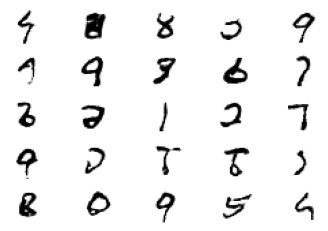

In [34]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

# load model
model = g_model #load_model('C:/Users/jiahu/generator_model_100.h5')
# generate images
latent_points = generate_latent_points(100, 25)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 5)

INFO:plaidml:Analyzing Ops: 14 of 26 operations complete


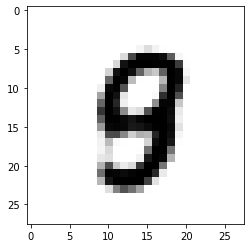

In [37]:
# example of generating an image for a specific point in the latent space
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# load model
model = g_model#load_model('C:/Users/jiahu/generator_model_100.h5')
# all 0s
vector = asarray([[0.0 for _ in range(100)]])
# generate image
X = model.predict(vector)
# plot the result
pyplot.imshow(X[0, :, :, 0], cmap='gray_r')
pyplot.show()